# TEAM NAME: ANALYTIX
# IIT KHARAGPUR
# Sumit Kumar Agrawal 
# Shirsha Chowdhury
# Rohit Singh Tomar
# Ikshu Manjan

## Import statements 

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [27]:
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

In [28]:
import xgboost as xgb
import seaborn as sns

## Load Dataset

In [29]:
data=pd.read_csv("C://Users//LENOVO//Desktop//Data_set3.csv")

In [30]:
data.shape

(136, 2163)

In [31]:
data.columns

Index(['Sample ', 'TC (%)', 'TN (%)', 'Zn', 'S', 'K', 'Ca', 'Ti', 'Mn', 'Fe',
       ...
       '2490', '2491', '2492', '2493', '2494', '2495', '2496', '2497', '2498',
       '2499'],
      dtype='object', length=2163)

In [32]:
data.head(5)

Sample   TC (%)  TN (%)    Zn     S     K     Ca   Ti    Mn    Fe    ...     \
0   ITA-1  43.347   1.120  36.5  1451  2397  21414  172   780  1609    ...      
1   ITA-2  31.961   1.372  44.4  1765  3337  18727  414   917  3176    ...      
2   ITA-3  43.347   1.129  34.6  1156  1919  17868   96   784   999    ...      
3   ITA-4  36.456   1.432  46.5  1681  3049  22341  295  1404  2744    ...      
4   ITA-5  45.445   1.314  36.9  1403  1818  30621   76   142   725    ...      

       2490      2491      2492      2493      2494      2495      2496  \
0 -0.001145 -0.000503  0.000179  0.000181 -0.000007 -0.000013  0.000027   
1 -0.001067 -0.000095  0.000819  0.000664  0.000135 -0.000450 -0.001099   
2 -0.001360 -0.000317  0.000669  0.000491 -0.000028 -0.000241 -0.000379   
3 -0.001166  0.000041  0.001094  0.000779  0.000014 -0.000546 -0.001070   
4 -0.001310 -0.000631  0.000152  0.000276  0.000182  0.000006 -0.000240   

       2497      2498      2499  
0  0.000090  0.000184  0.000352  
1 -0.000883  0.000060  0.000469  
2 -0.000412 -0.000346 -0.000209  
3 -0.000840  0.000068  0.000070  
4 -0.000180  0.000119  0.000342  

[5 rows x 2163 columns]

In [33]:
data.describe()

TC (%)      TN (%)           Zn            S             K  \
count  136.000000  136.000000   136.000000   136.000000    136.000000   
mean    39.056257    1.105250   337.655147  1805.117647   3827.294118   
std      8.598738    0.403016   618.741541   806.148613   2704.457402   
min      0.000000    0.000000    27.900000   558.000000    837.000000   
25%     34.743500    0.848250    48.800000  1217.750000   1779.500000   
50%     40.950000    1.138500    66.900000  1701.500000   2582.500000   
75%     45.245000    1.406500   116.500000  2206.250000   5748.250000   
max     51.300000    1.874000  2392.000000  4394.000000  11654.000000   

                 Ca           Ti           Mn            Fe          Rb  \
count    136.000000   136.000000   136.000000    136.000000  136.000000   
mean   25309.227941   666.632353   473.397059   4982.882353   15.959559   
std    14522.957500   761.095661   311.439817   4935.060461   10.847580   
min     4856.000000    20.000000    35.000000    246.000000    3.400000   
25%    15676.500000   117.500000   213.000000    958.750000    6.700000   
50%    22484.500000   426.000000   441.500000   3545.000000   13.250000   
75%    31468.000000   879.750000   682.250000   7997.000000   21.425000   
max    75582.000000  3171.000000  1488.000000  21152.000000   58.100000   

          ...            2490        2491          2492        2493  \
count     ...      136.000000  136.000000  1.360000e+02  136.000000   
mean      ...       -0.001160   -0.000590  5.048860e-05    0.000168   
std       ...        0.000410    0.000293  5.521271e-04    0.000511   
min       ...       -0.002289   -0.001254 -1.656249e-03   -0.001018   
25%       ...       -0.001421   -0.000805 -2.890638e-04   -0.000203   
50%       ...       -0.001172   -0.000580 -6.250000e-07    0.000154   
75%       ...       -0.000881   -0.000374  4.240645e-04    0.000484   
max       ...        0.000000    0.000041  1.231253e-03    0.001715   

             2494        2495        2496        2497        2498        2499  
count  136.000000  136.000000  136.000000  136.000000  136.000000  136.000000  
mean     0.000104   -0.000072   -0.000324   -0.000216    0.000184    0.000433  
std      0.000466    0.000278    0.000461    0.000517    0.000410    0.000515  
min     -0.001111   -0.000780   -0.001574   -0.001696   -0.000921   -0.000746  
25%     -0.000215   -0.000242   -0.000652   -0.000546   -0.000039    0.000091  
50%     -0.000010   -0.000054   -0.000284   -0.000180    0.000142    0.000393  
75%      0.000343    0.000083   -0.000017    0.000114    0.000479    0.000843  
max      0.001664    0.000569    0.000891    0.001056    0.001191    0.001820  

[8 rows x 2162 columns]

## Cleaning the data

C:\Users\LENOVO\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


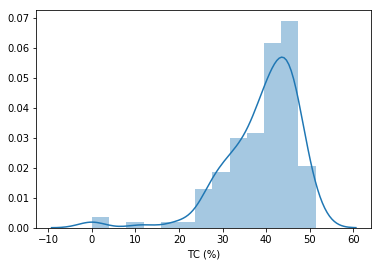

In [34]:
sns.distplot(data["TC (%)"])

C:\Users\LENOVO\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


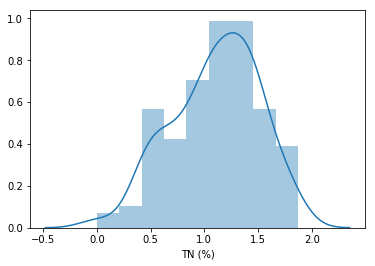

In [35]:
sns.distplot(data["TN (%)"])

In [36]:
data=data.drop([114,116,105])
data=data.reset_index(drop=True)

## Splitting the data into elemental and spectral dataset

In [37]:
data_element=data[data.columns[:14]]

In [38]:
print(data_element.columns)
data_element.shape

Index(['Sample ', 'TC (%)', 'TN (%)', 'Zn', 'S', 'K', 'Ca', 'Ti', 'Mn', 'Fe',
       'Rb', 'Sr', 'Al', 'Si'],
      dtype='object')


(133, 14)

In [39]:
data_spectral=data.drop(["Zn","S","K","Ca","Ti","Mn","Fe","Rb","Sr","Al","Si"],axis=1)

In [40]:
print(data_spectral.columns)
data_spectral.shape

Index(['Sample ', 'TC (%)', 'TN (%)', '351', '352', '353', '354', '355', '356',
       '357',
       ...
       '2490', '2491', '2492', '2493', '2494', '2495', '2496', '2497', '2498',
       '2499'],
      dtype='object', length=2152)


(133, 2152)

## Bivariate Analysis

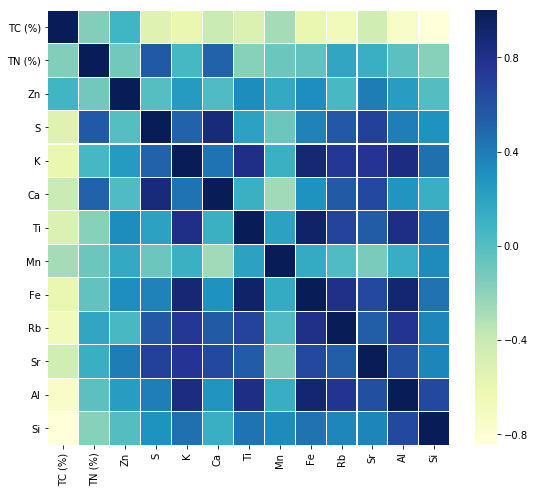

In [41]:
corrmat = data_element.corr() 
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 

## TC analysis

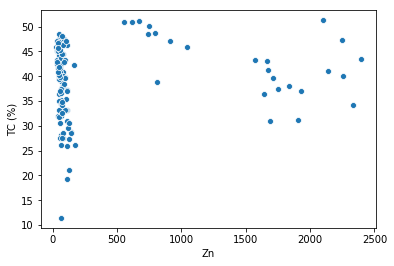

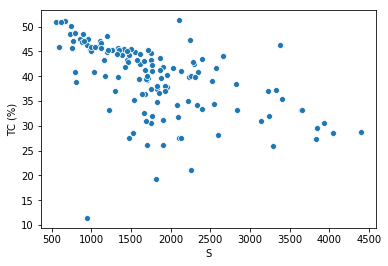

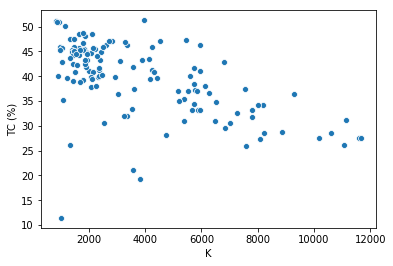

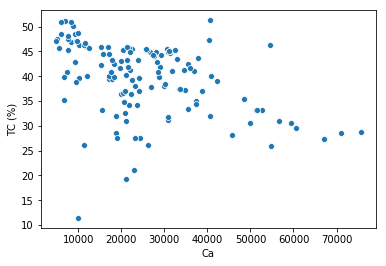

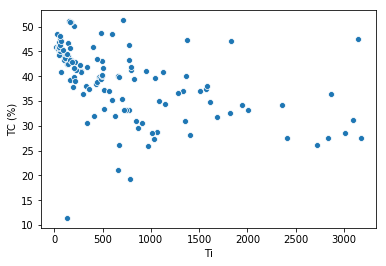

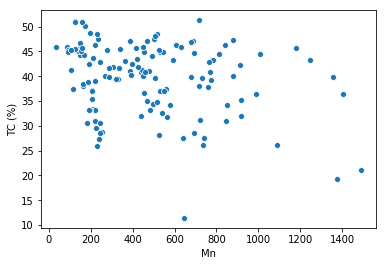

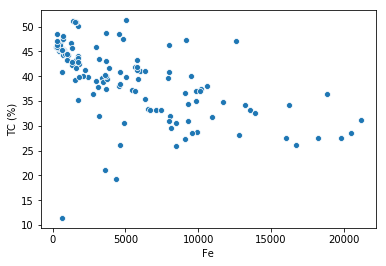

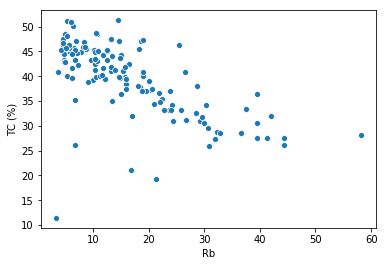

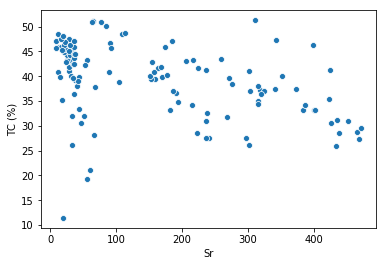

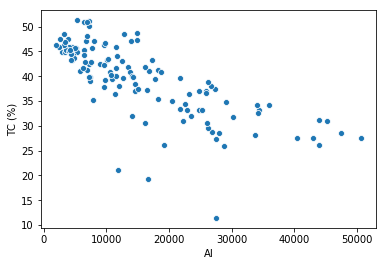

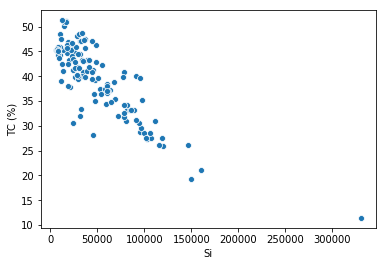

In [42]:
ls=["Zn","S","K","Ca","Ti","Mn","Fe","Rb","Sr","Al","Si"]
for k in ls: #To see all the plots of TC vs the elemental features
    plt.figure()
    sns.scatterplot(x=data_element[k],y=data_element["TC (%)"])

In [43]:
feature_elementC=data_element[["S","K","Ca","Ti","Rb","Sr","Al","Si"]]
TC_target=data_element["TC (%)"]

In [44]:
feature_elementC.head(2)

S     K     Ca   Ti    Rb    Sr        Al        Si
0  1451  2397  21414  172   9.7  29.2  10062.13  39006.40
1  1765  3337  18727  414  17.0  32.2  14141.88  71818.36

### Scaling the data

In [45]:
#Scaling is done so as to improve linear Regression and KNN
from sklearn.preprocessing import StandardScaler
S= StandardScaler()
x_scaled=S.fit_transform(feature_elementC)

In [46]:
x_train, x_test, y_train, y_test = train_test_split(feature_elementC,TC_target,test_size=0.3 ,random_state=56)

In [47]:
from sklearn.metrics import r2_score
def testscore(y_predicted,y_test,i): #to calculate r2 score
    r2=r2_score(y_test,y_predicted)
    print ("The final r2 score is for model",i ," is",r2) 

def rmse(y_predict,y_test,i): #to calculate rmse
    rmse=(((y_test-y_predict)**2).mean())**0.5
    print ("The rmse of for model ",i,"is ",rmse)

In [48]:
model1=LinearRegression()
model2=DecisionTreeRegressor()
model3=RandomForestRegressor()
model4= KNeighborsRegressor(n_neighbors=5)
model5= GradientBoostingRegressor()
model6=AdaBoostRegressor()
model7= xgb.XGBRegressor(max_depth=3) #using grid search

In [49]:
model1.fit(x_train,y_train)
model2.fit(x_train,y_train)
model3.fit(x_train,y_train)
model4.fit(x_train,y_train)
model7.fit(x_train,y_train)
model6.fit(x_train,y_train)
model5.fit(x_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [50]:
y1=model1.predict(x_test)
y2=model2.predict(x_test)
y3=model3.predict(x_test)
y4=model4.predict(x_test)
y6=model6.predict(x_test)
y7=model7.predict(x_test)
y5=model5.predict(x_test)



rmse(y1,y_test,1)
rmse(y2,y_test,2)
rmse(y3,y_test,3)
rmse(y4,y_test,4)
rmse(y6,y_test,5)
rmse(y7,y_test,6)
rmse(y5,y_test,7)

testscore(y1,y_test,1)
testscore(y2,y_test,2)
testscore(y3,y_test,3)
testscore(y4,y_test,4)
testscore(y5,y_test,5)
testscore(y6,y_test,6)
testscore(y7,y_test,7)


The rmse of for model  1 is  2.226395931349935
The rmse of for model  2 is  2.6458899967685743
The rmse of for model  3 is  2.1601260625250553
The rmse of for model  4 is  2.3459945042561374
The rmse of for model  5 is  2.122941538456448
The rmse of for model  6 is  2.426872358921676
The rmse of for model  7 is  1.6960305573554761
The final r2 score is for model 1  is 0.8609104099470049
The final r2 score is for model 2  is 0.8035584299672933
The final r2 score is for model 3  is 0.8690673308300432
The final r2 score is for model 4  is 0.8455656841245371
The final r2 score is for model 5  is 0.9192844569359726
The final r2 score is for model 6  is 0.8735362961458834
The final r2 score is for model 7  is 0.8347339305614525


# The inference is that the XG-Boost model performs best while predicting TC(%) with RMSE=1.696(using elemental data)

# TN analysis

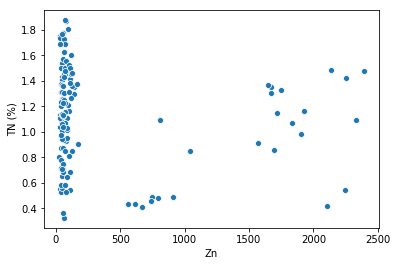

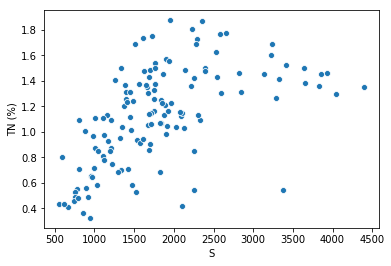

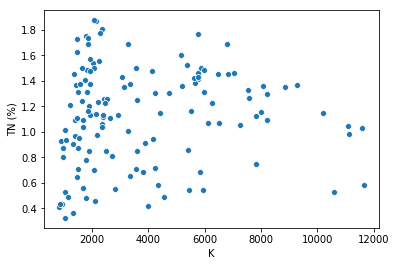

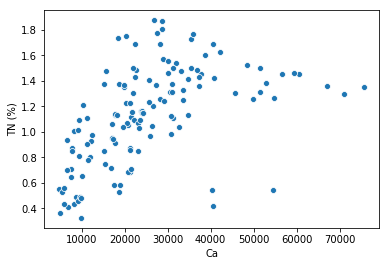

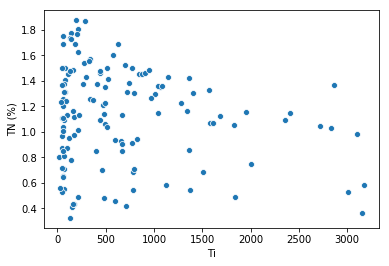

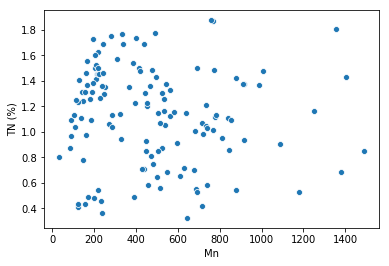

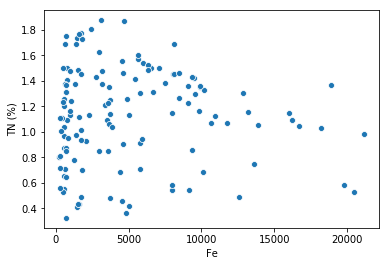

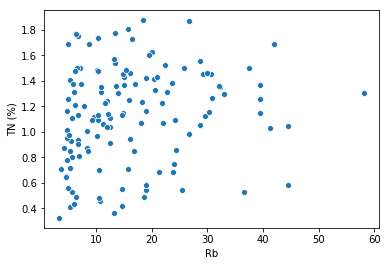

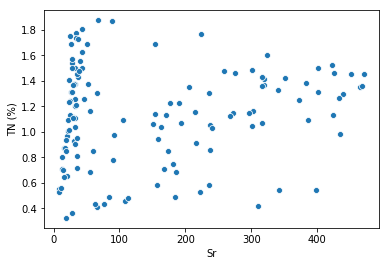

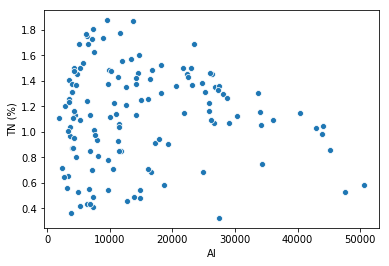

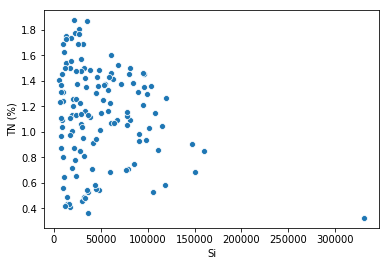

In [51]:
ls=["Zn","S","K","Ca","Ti","Mn","Fe","Rb","Sr","Al","Si"]
for k in ls: 
    plt.figure()
    sns.scatterplot(x=data_element[k],y=data_element["TN (%)"])

C:\Users\LENOVO\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


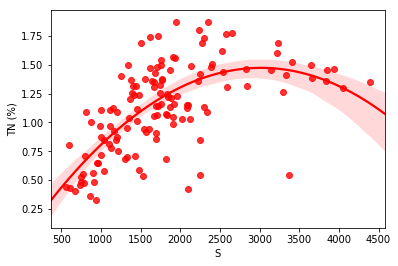

In [52]:
sns.regplot(data_element['S'],data_element['TN (%)'],order=2,color='red') #This is the plot for TN vs S where we are using polynomial regression of degree 2

C:\Users\LENOVO\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


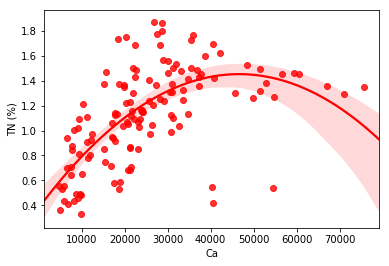

In [53]:
sns.regplot(data_element['Ca'],data_element['TN (%)'],order=2,color='red') #This is the plot for TN vs S where we are using polynomial regression of degree 2

### Only calcium, sulphur and alumunium are important variables while predicting TN(%)

In [54]:
feature_elementN=data_element[["S","Ca","Al"]]
TN_target=data_element["TN (%)"]

In [55]:
x_scaled1=S.fit_transform(feature_elementN)

#### Using polynomial regression

In [56]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2) 
XN_poly = poly.fit_transform(x_scaled1)  #using polynomial  features

In [57]:
x_train, x_test, y_train, y_test = train_test_split(XN_poly,TN_target,test_size=0.3 ,random_state=56)

In [58]:
model1.fit(x_train,y_train)
model2.fit(x_train,y_train)
model3.fit(x_train,y_train)
model4.fit(x_train,y_train)
model7.fit(x_train,y_train)
model6.fit(x_train,y_train)
model5.fit(x_train,y_train)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [59]:
y1=model1.predict(x_test)
y2=model2.predict(x_test)
y3=model3.predict(x_test)
y4=model4.predict(x_test)
y6=model6.predict(x_test)
y7=model7.predict(x_test)
y5=model5.predict(x_test)


rmse(y1,y_test,1)
rmse(y2,y_test,2)
rmse(y3,y_test,3)
rmse(y4,y_test,4)
rmse(y6,y_test,5)
rmse(y7,y_test,6)
rmse(y5,y_test,7)

testscore(y1,y_test,1)
testscore(y2,y_test,2)
testscore(y3,y_test,3)
testscore(y4,y_test,4)
testscore(y5,y_test,5)
testscore(y6,y_test,6)
testscore(y7,y_test,7)


The rmse of for model  1 is  0.19182673593652672
The rmse of for model  2 is  0.25224809216325106
The rmse of for model  3 is  0.1882807571155375
The rmse of for model  4 is  0.14922847583487545
The rmse of for model  5 is  0.16962736004700726
The rmse of for model  6 is  0.18989030699454149
The rmse of for model  7 is  0.17020798296708742
The final r2 score is for model 1  is 0.7236944496214106
The final r2 score is for model 2  is 0.5222209359207028
The final r2 score is for model 3  is 0.7338152277279618
The final r2 score is for model 4  is 0.8327851893002932
The final r2 score is for model 5  is 0.7824639765823802
The final r2 score is for model 6  is 0.7839455871066081
The final r2 score is for model 7  is 0.729244723970608


# The inference is that the KNN performs best while predicting TN(%) with RMSE=0.149(using elemental data)

# Spectral analysis

In [60]:
feature_specC=data_spectral.drop(["Sample ","TC (%)","TN (%)"],axis=1)
TC_target=data_spectral["TC (%)"]

In [61]:
feature_specC.head(2)

351       352       353       354       355       356       357  \
0 -0.004079 -0.003135 -0.002168 -0.002767 -0.002948 -0.002317 -0.001404   
1 -0.003471 -0.002537 -0.001896 -0.002639 -0.001939 -0.001231 -0.002312   

        358       359       360    ...         2490      2491      2492  \
0 -0.002922 -0.005383 -0.005025    ...    -0.001145 -0.000503  0.000179   
1 -0.003688 -0.004396 -0.003961    ...    -0.001067 -0.000095  0.000819   

       2493      2494      2495      2496      2497      2498      2499  
0  0.000181 -0.000007 -0.000013  0.000027  0.000090  0.000184  0.000352  
1  0.000664  0.000135 -0.000450 -0.001099 -0.000883  0.000060  0.000469  

[2 rows x 2149 columns]

In [62]:
TC_target.head(2)

0    43.347
1    31.961
Name: TC (%), dtype: float64

In [63]:
s=351
b=[]
for i in range(2149):
    b.append(s)
    s=s+1

C:\Users\LENOVO\Anaconda3\lib\site-packages\matplotlib\pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


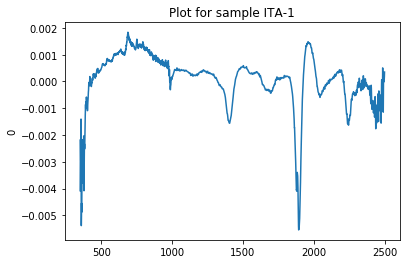

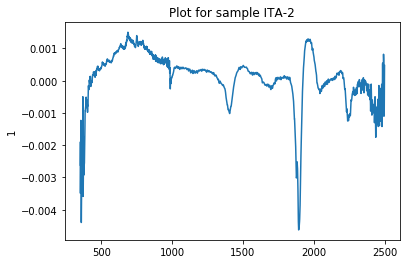

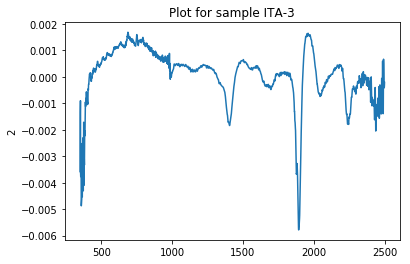

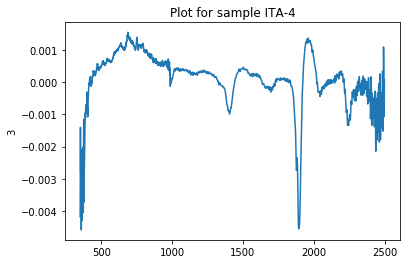

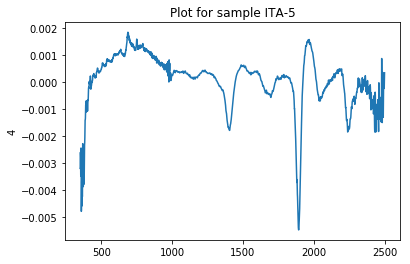

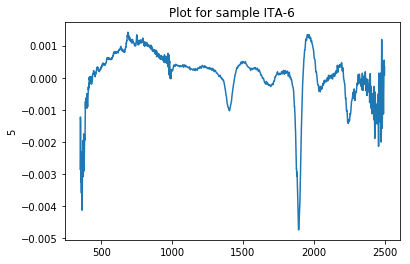

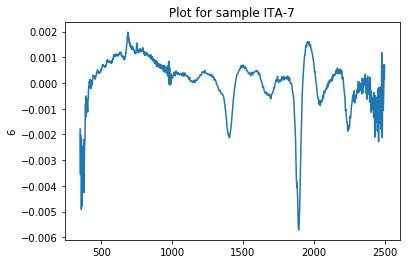

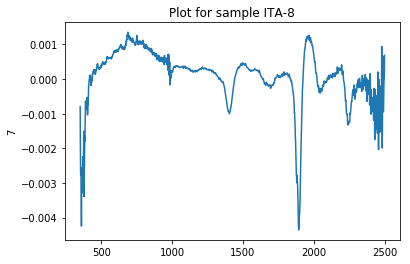

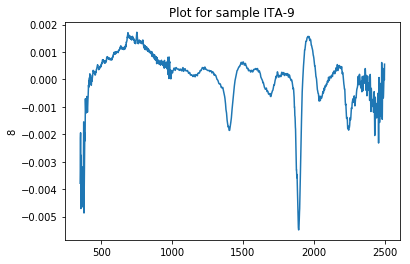

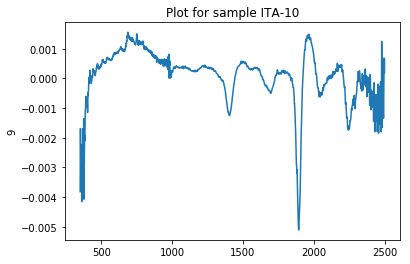

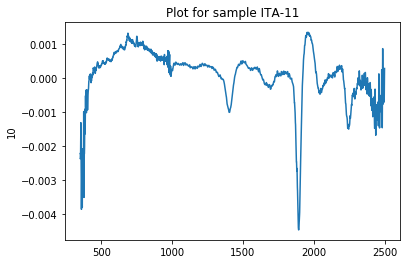

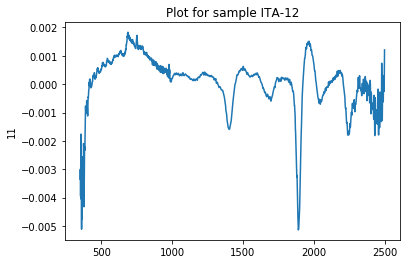

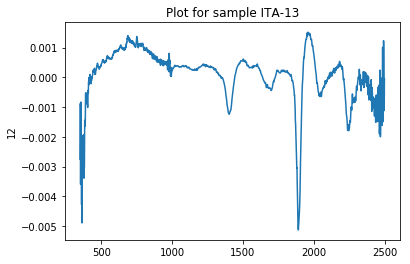

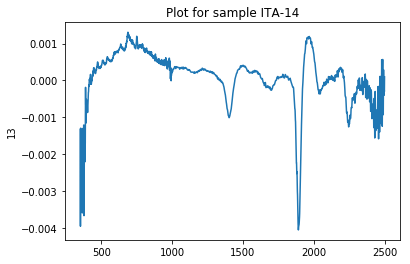

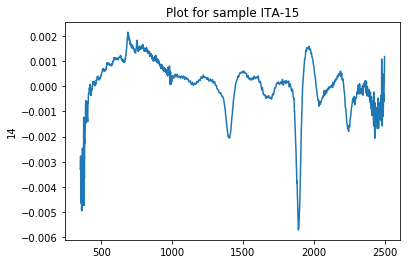

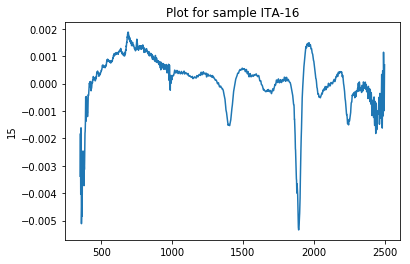

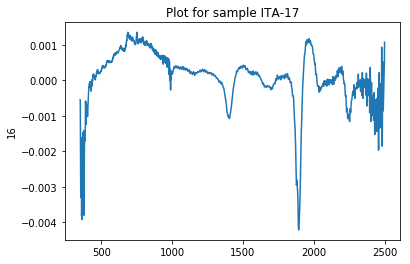

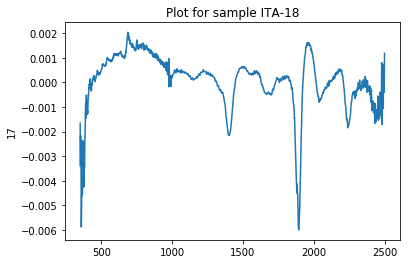

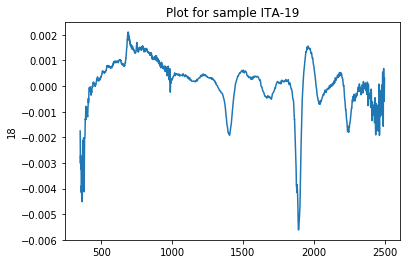

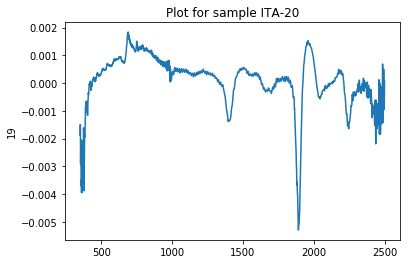

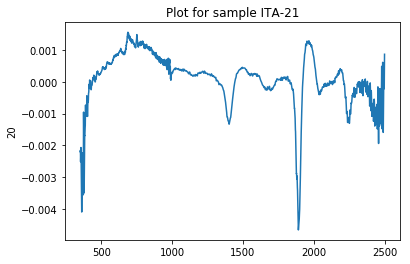

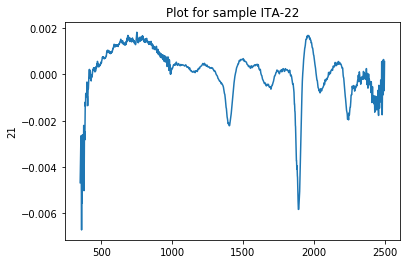

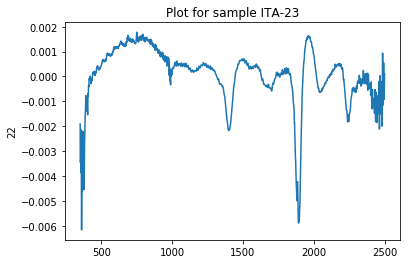

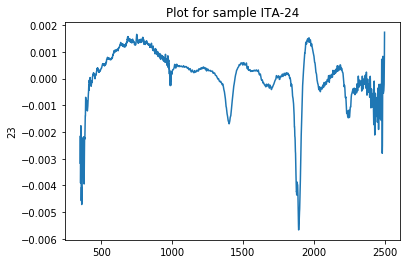

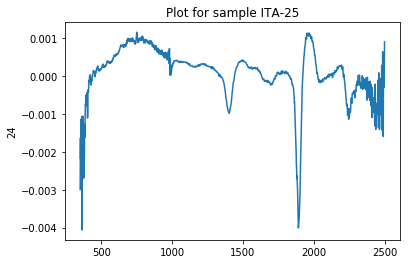

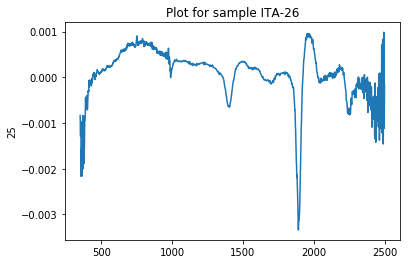

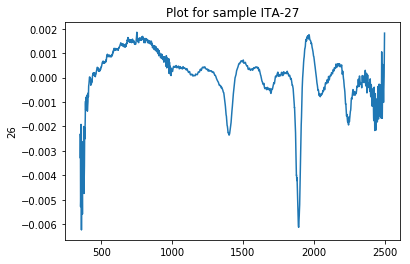

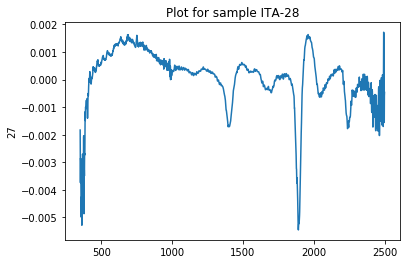

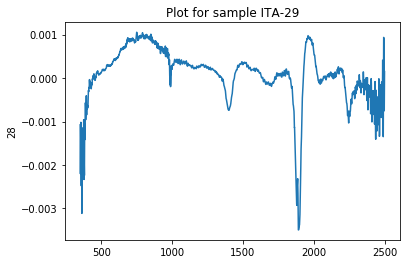

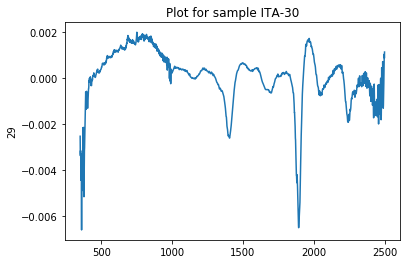

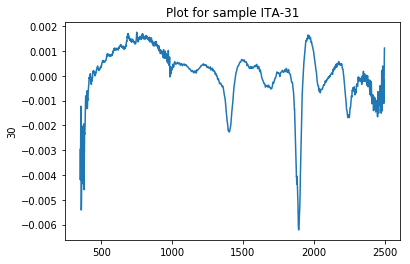

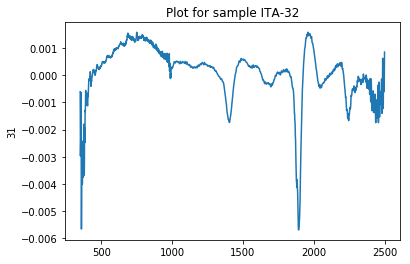

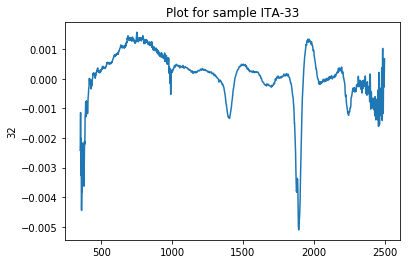

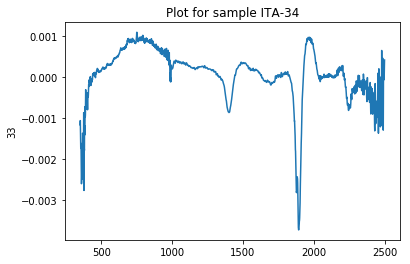

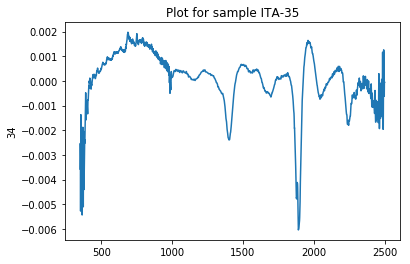

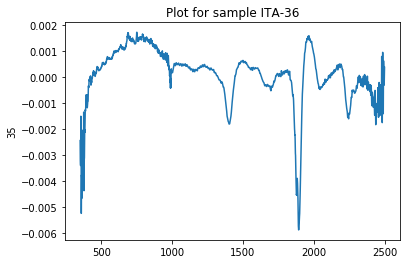

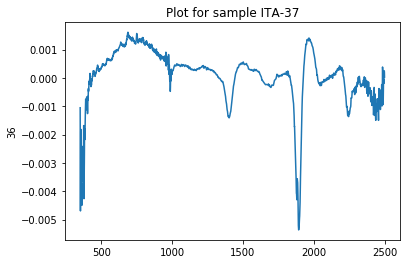

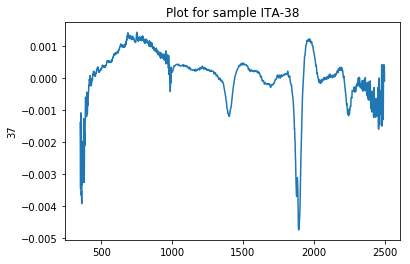

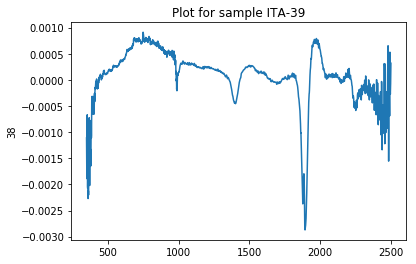

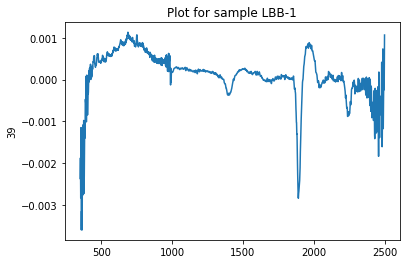

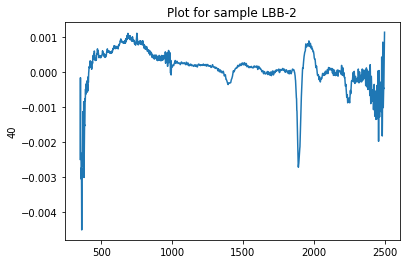

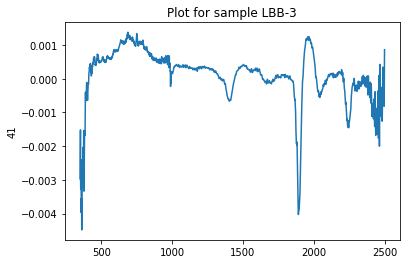

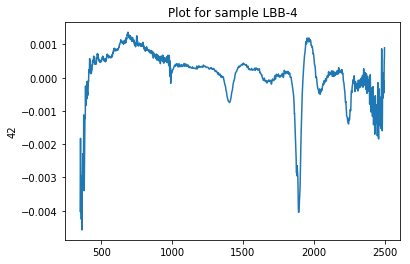

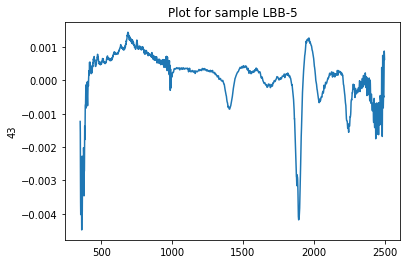

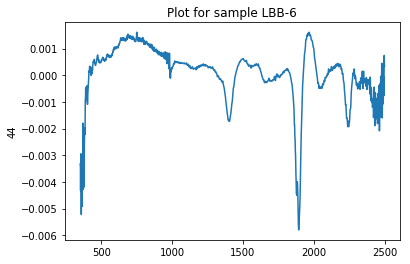

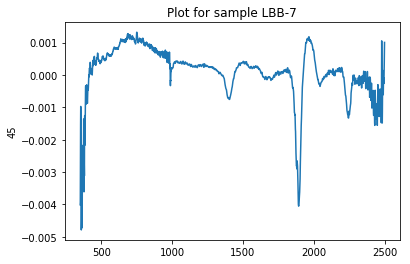

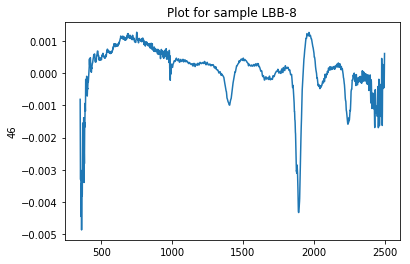

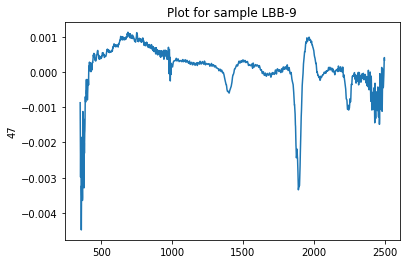

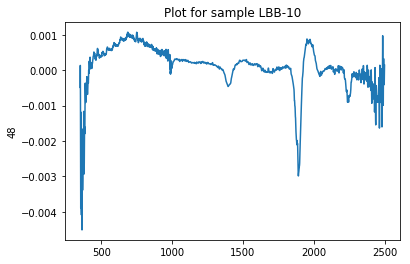

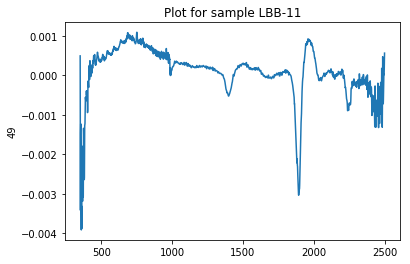

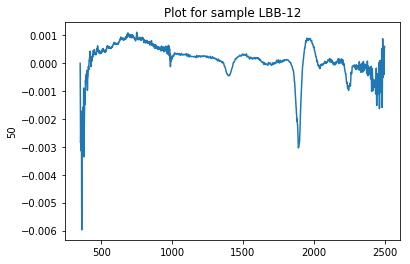

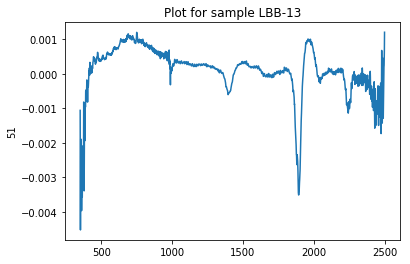

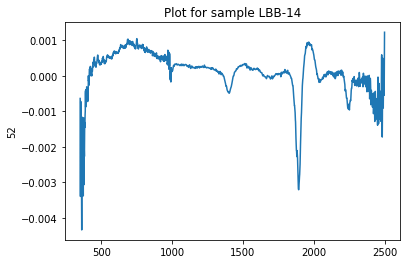

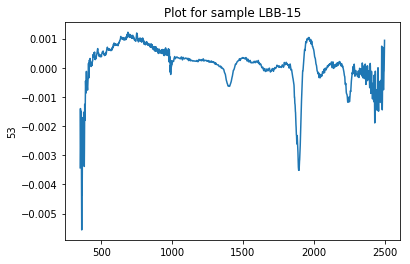

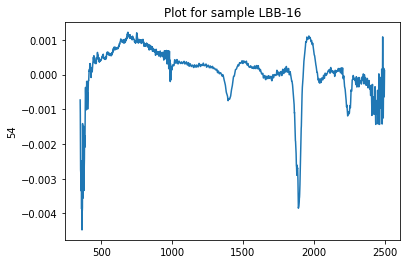

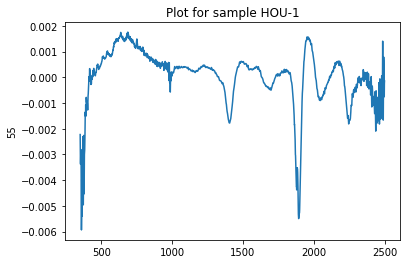

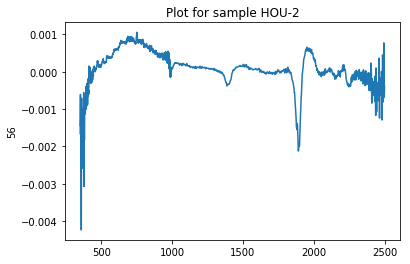

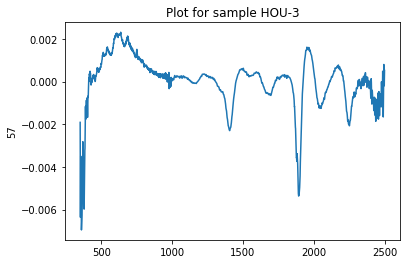

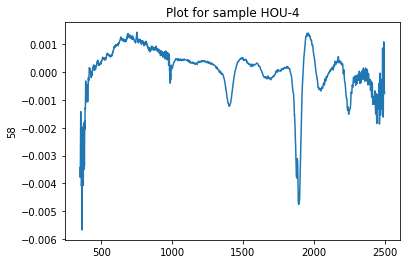

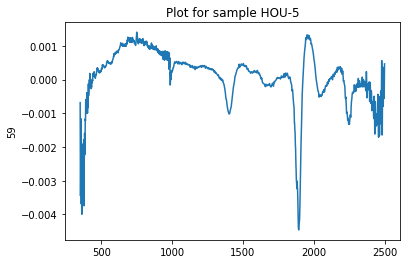

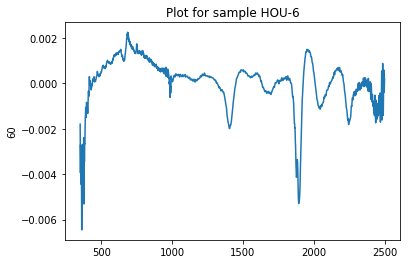

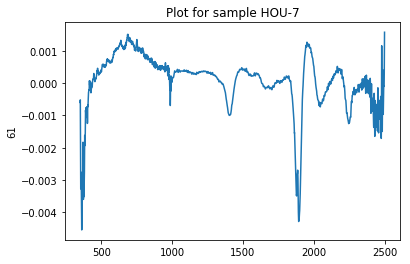

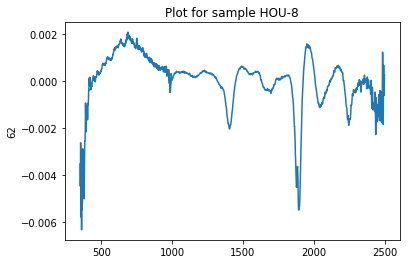

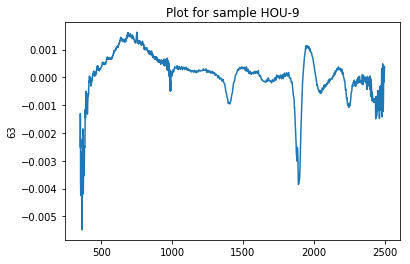

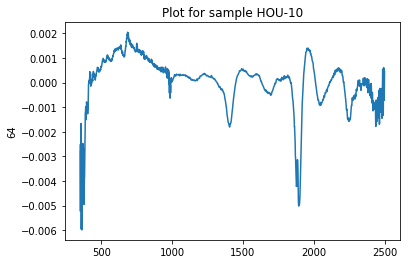

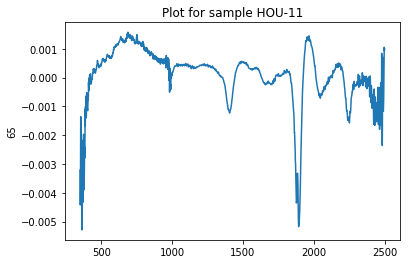

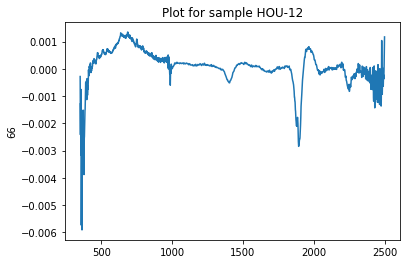

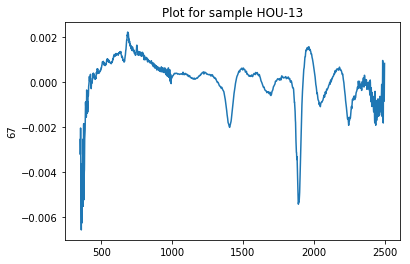

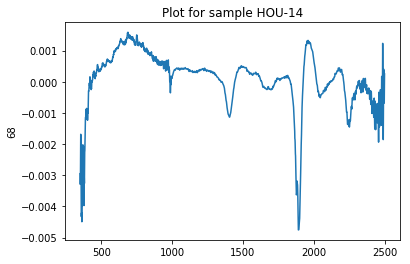

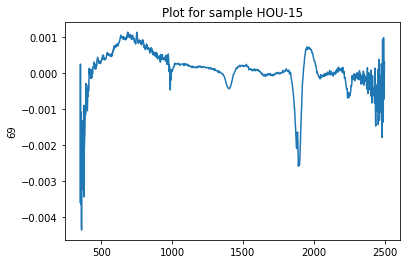

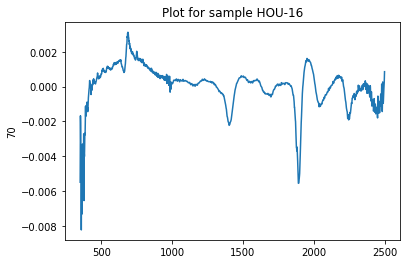

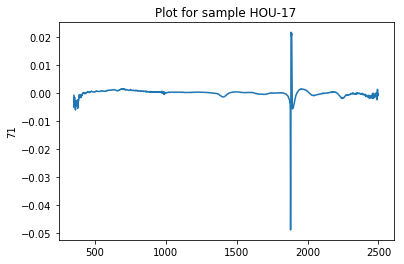

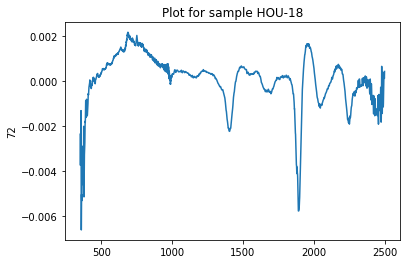

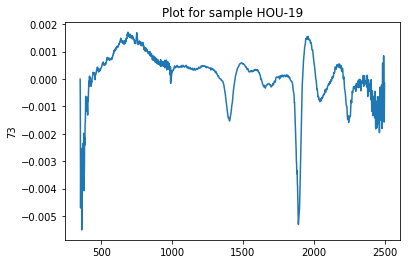

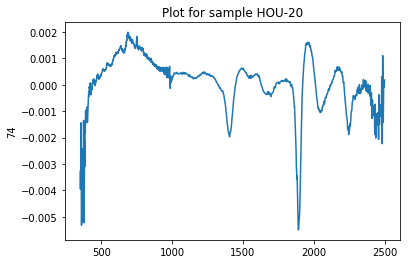

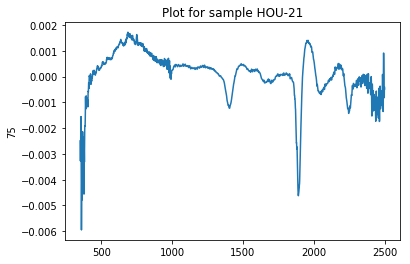

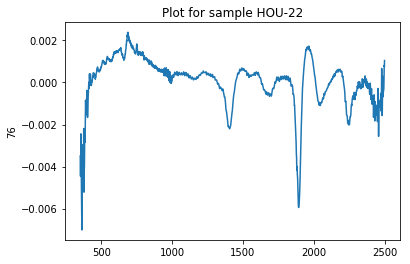

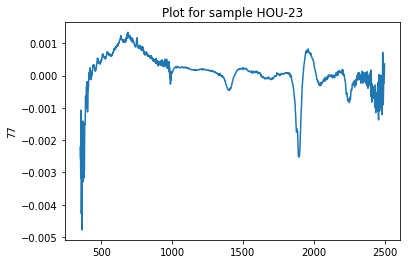

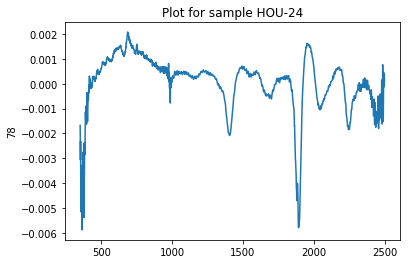

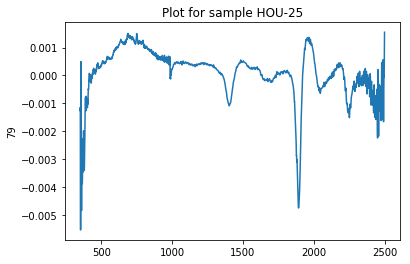

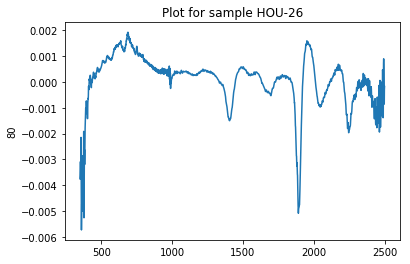

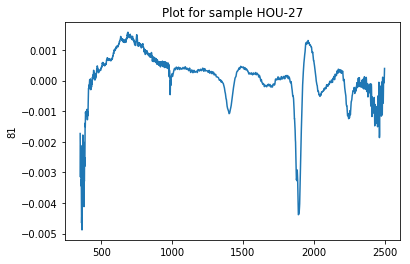

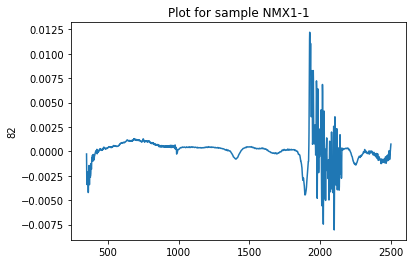

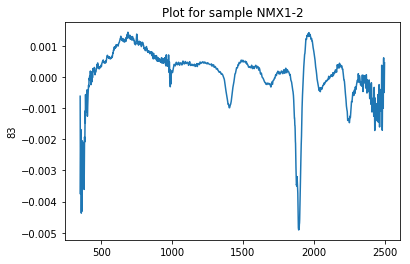

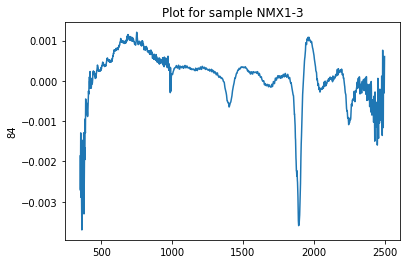

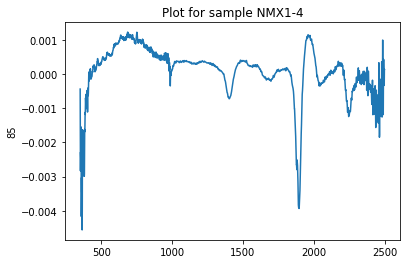

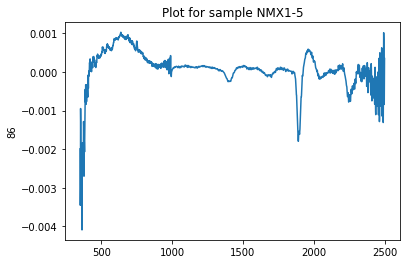

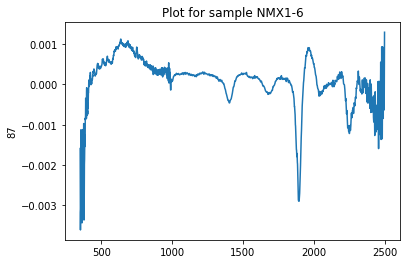

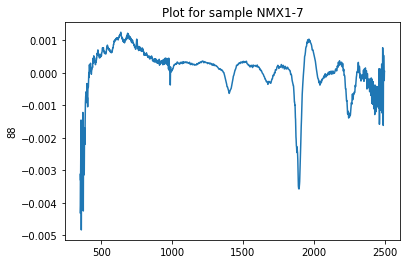

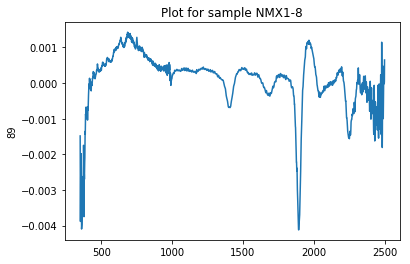

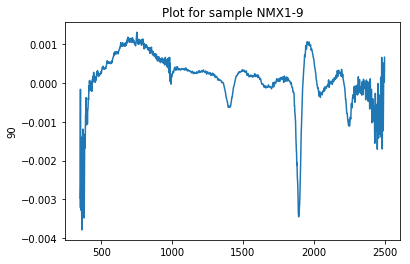

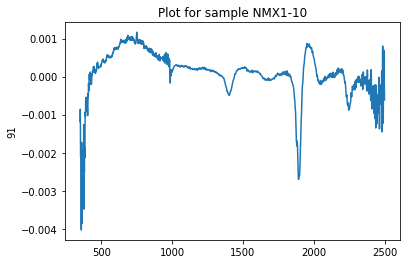

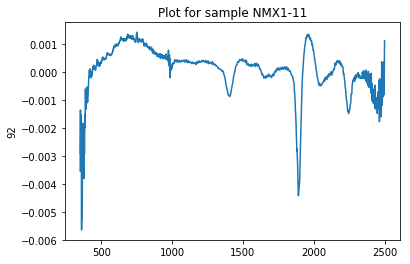

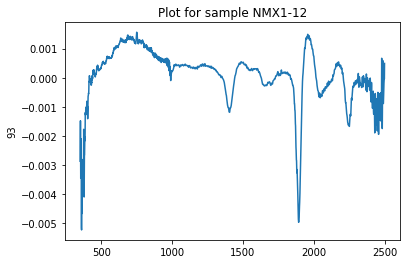

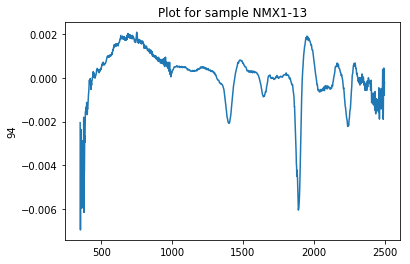

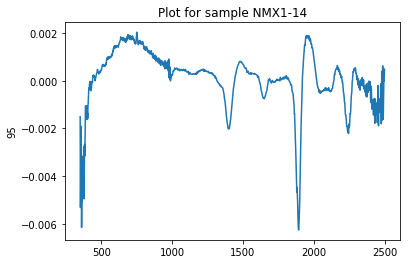

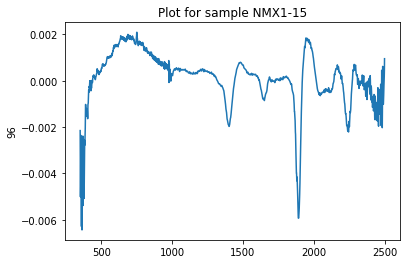

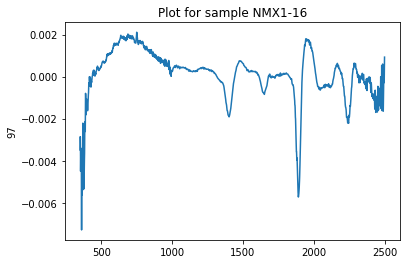

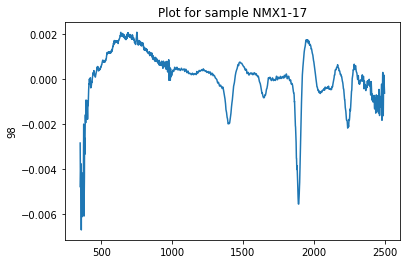

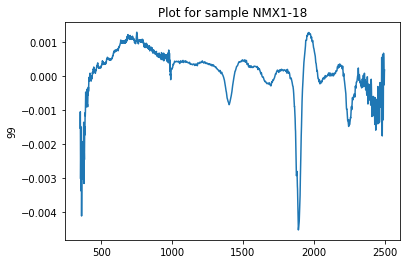

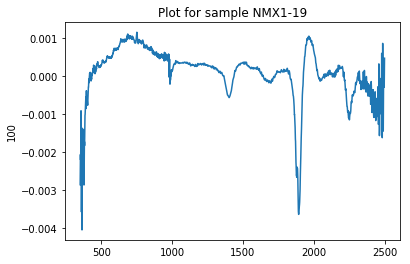

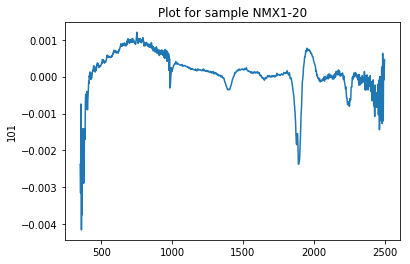

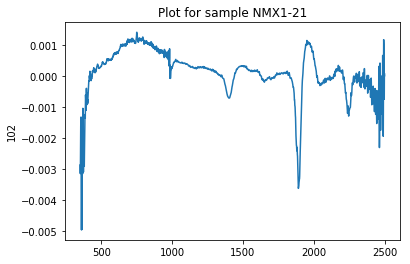

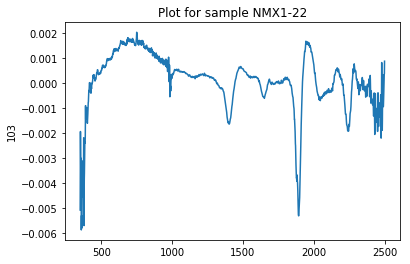

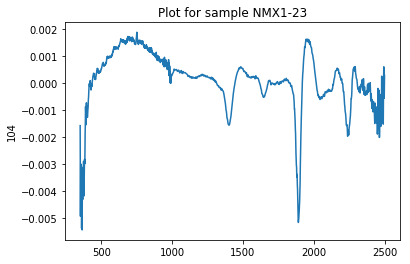

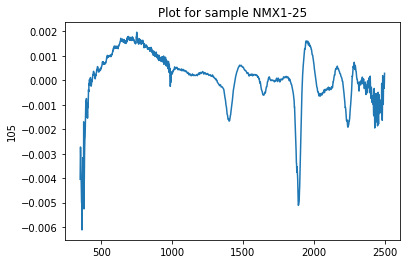

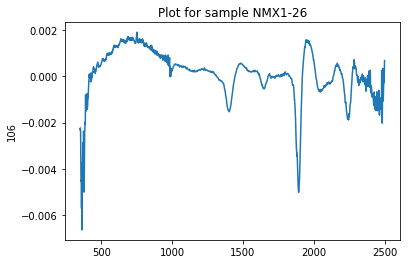

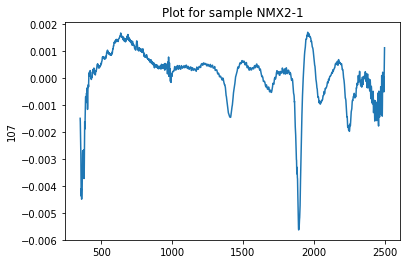

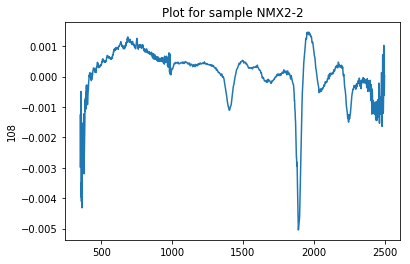

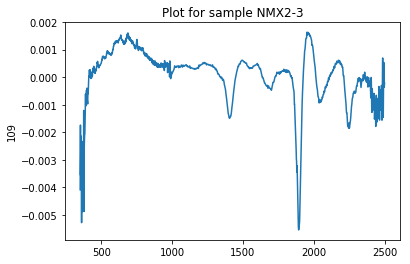

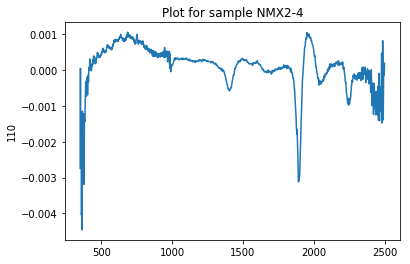

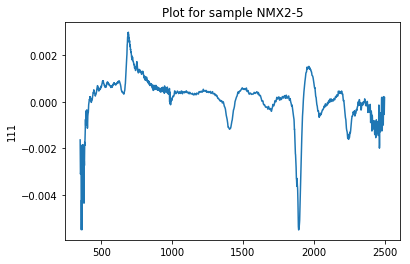

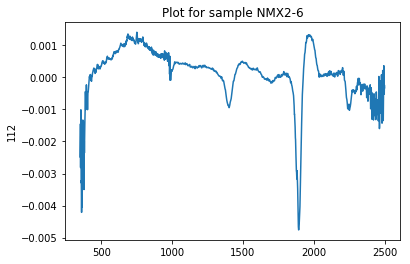

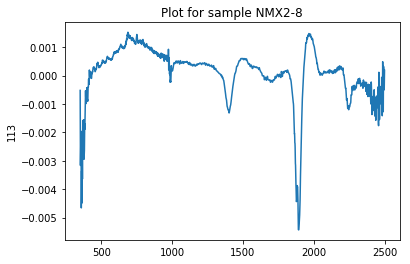

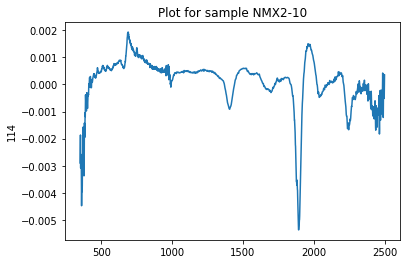

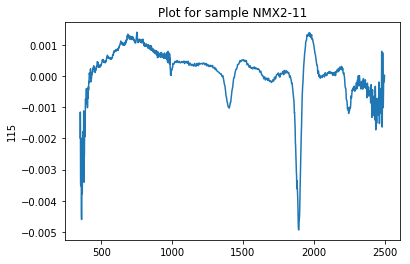

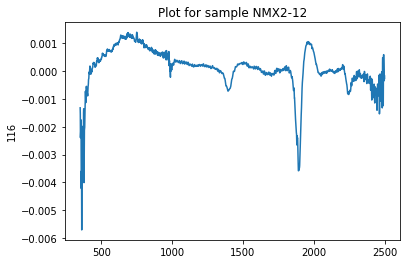

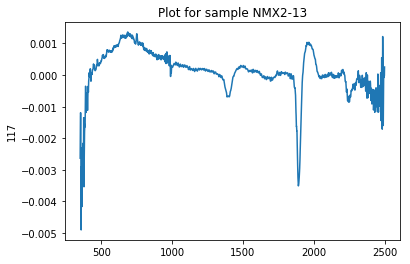

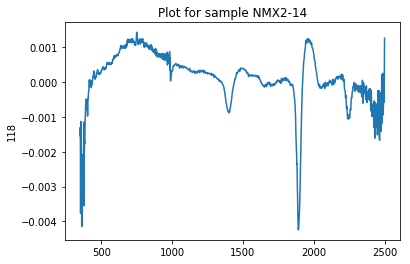

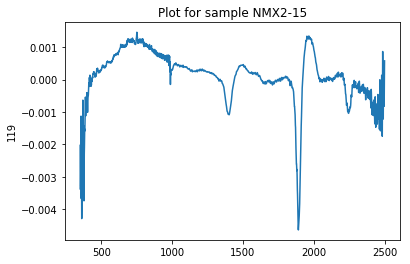

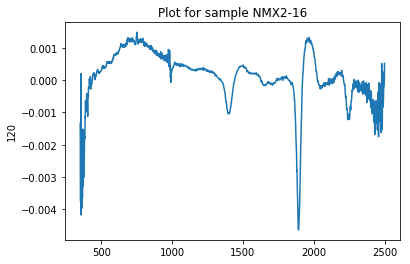

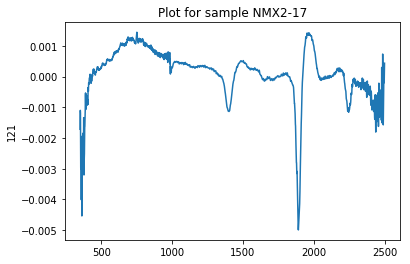

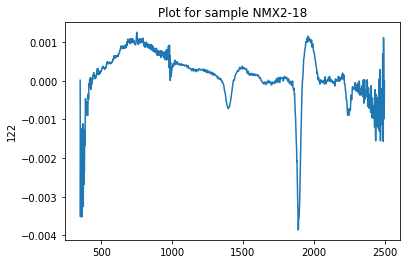

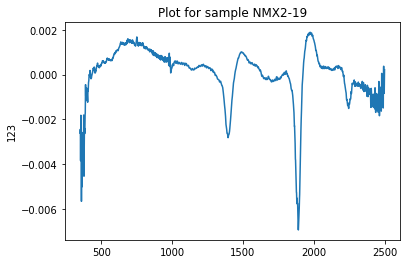

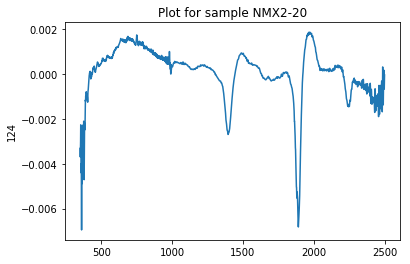

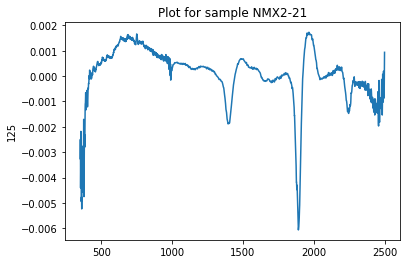

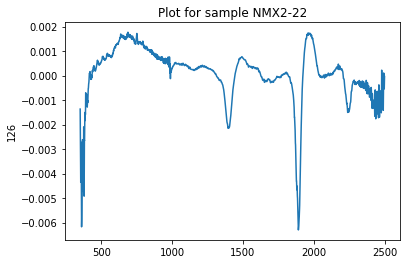

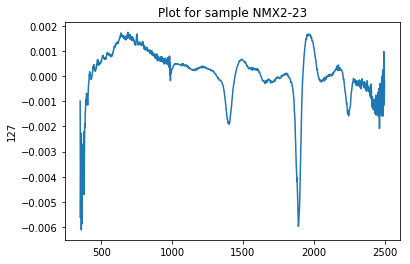

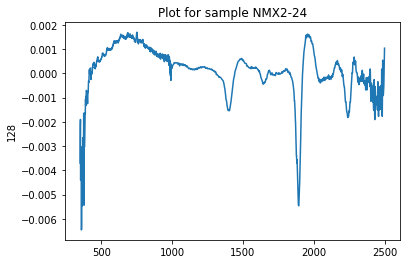

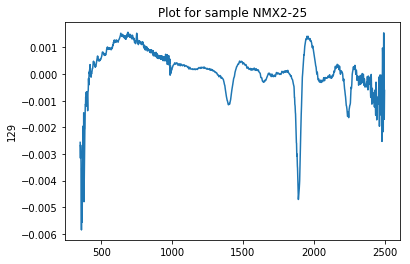

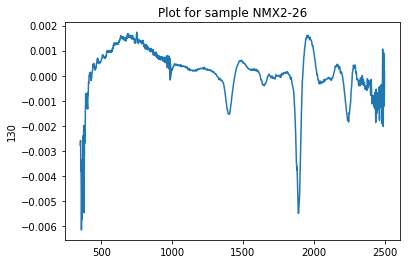

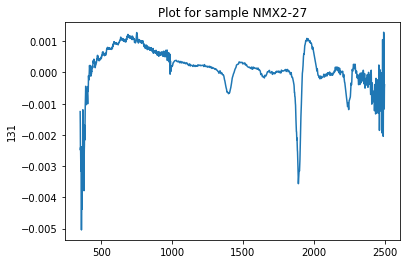

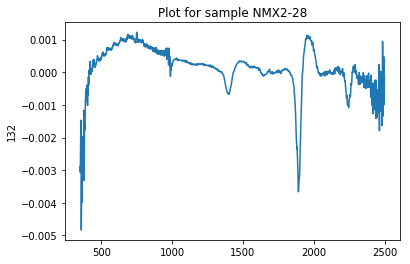

In [64]:
for i in range(len(feature_specC)):
    plt.figure()
    plt.title("Plot for sample "+data['Sample '][i])
    a=feature_specC.iloc[i]
    sns.lineplot(b,a)

C:\Users\LENOVO\Anaconda3\lib\site-packages\matplotlib\pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


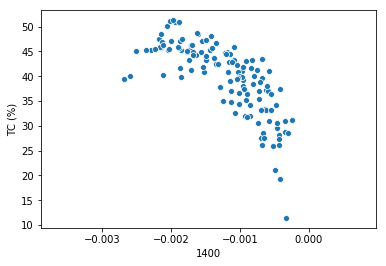

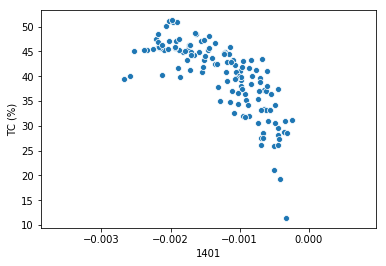

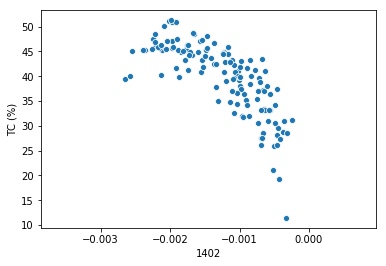

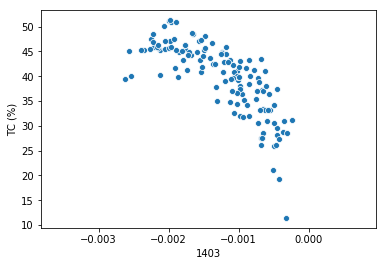

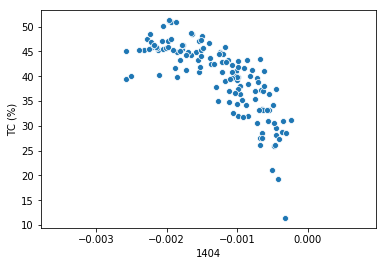

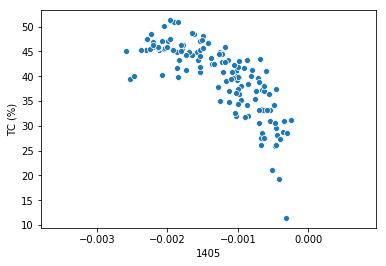

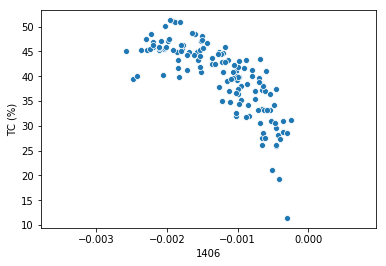

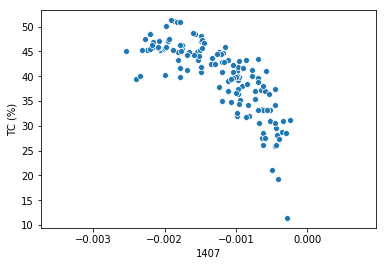

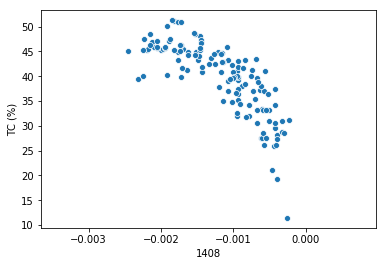

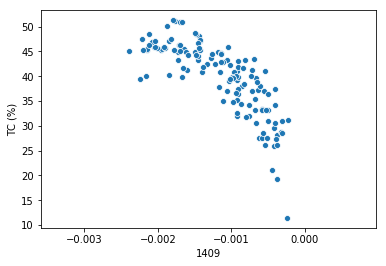

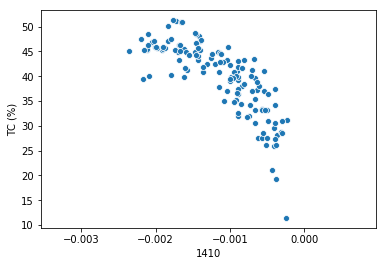

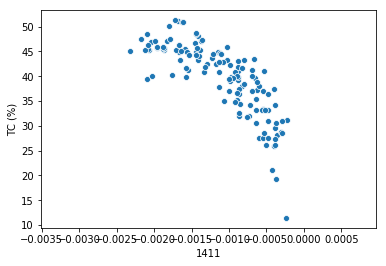

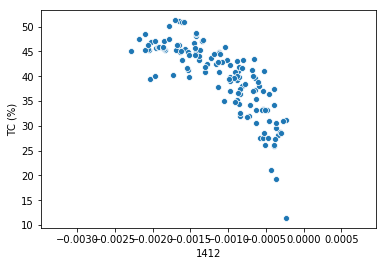

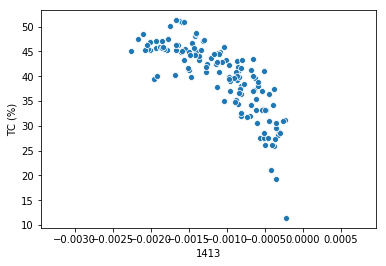

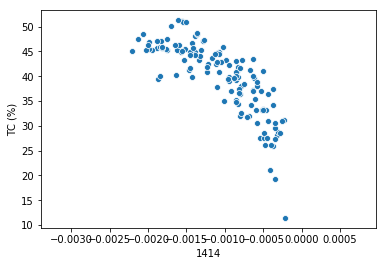

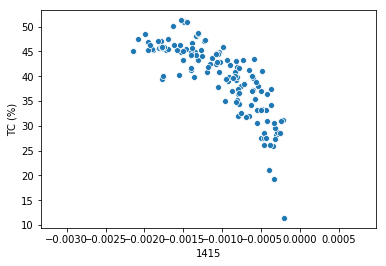

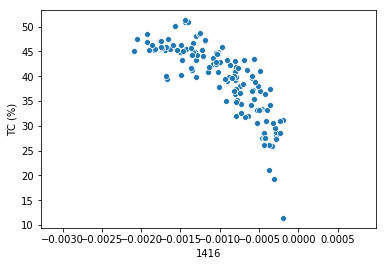

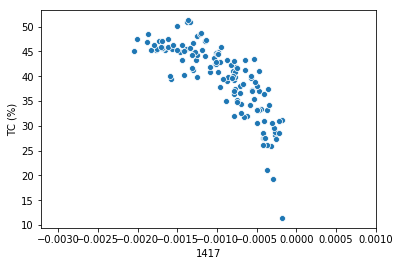

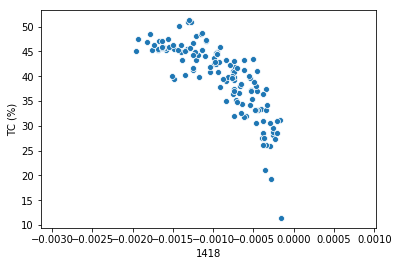

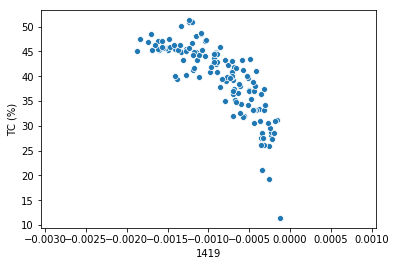

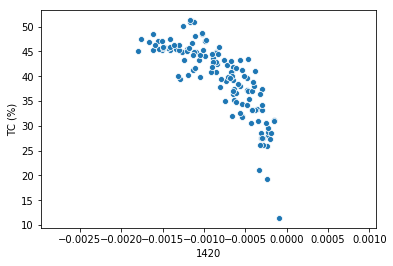

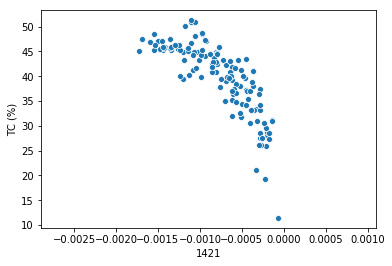

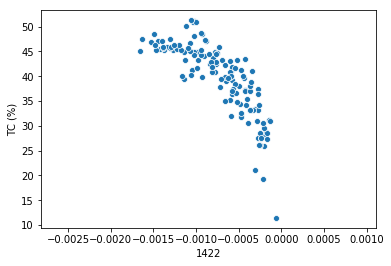

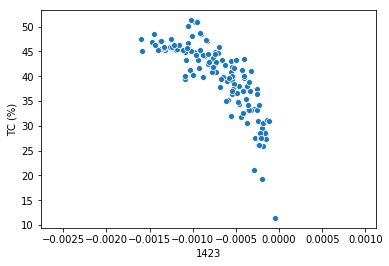

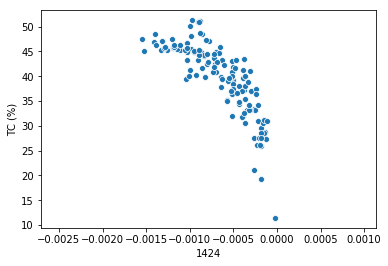

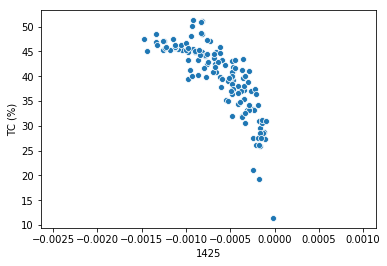

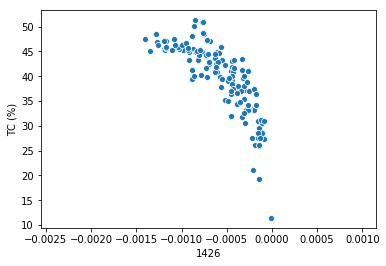

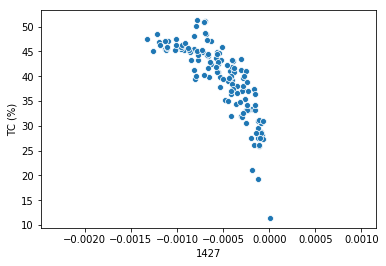

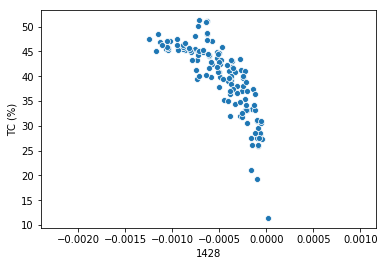

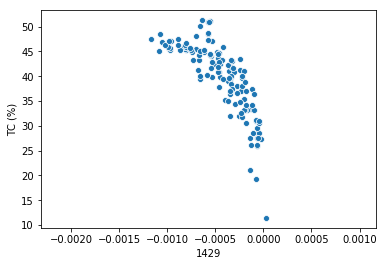

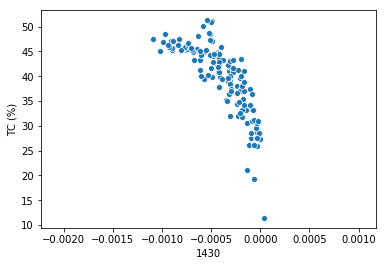

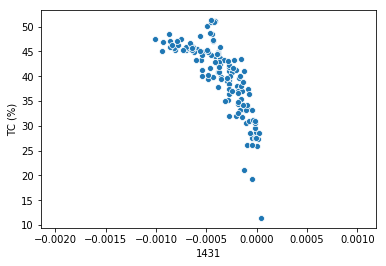

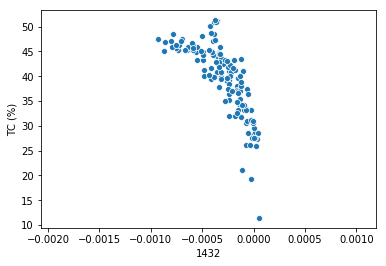

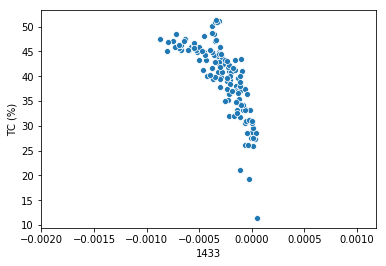

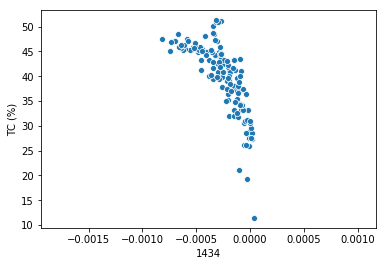

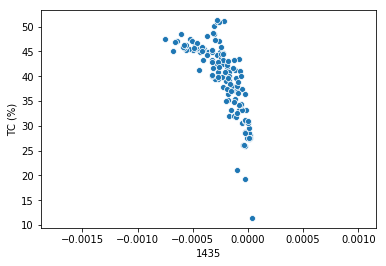

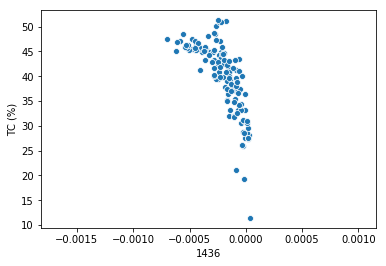

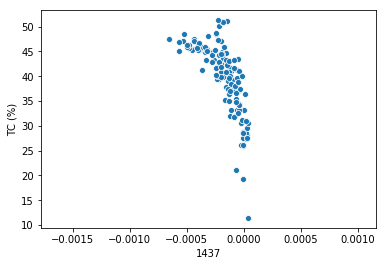

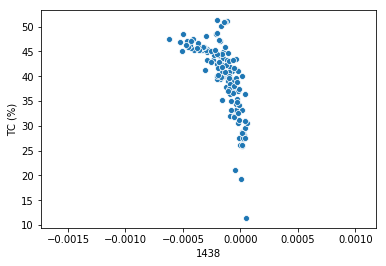

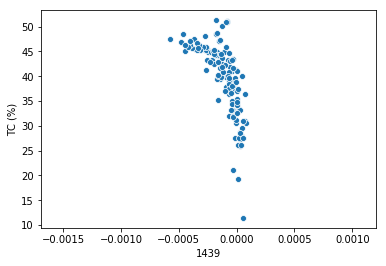

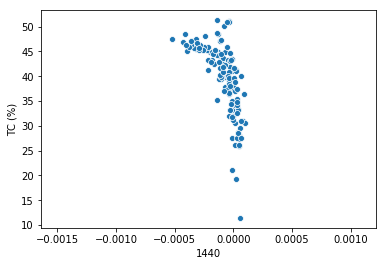

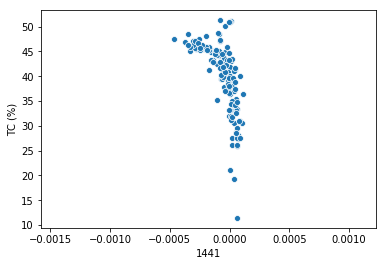

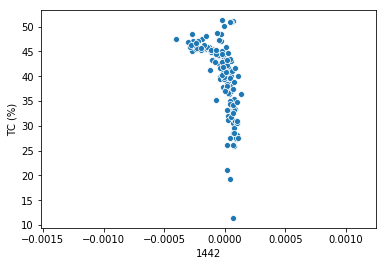

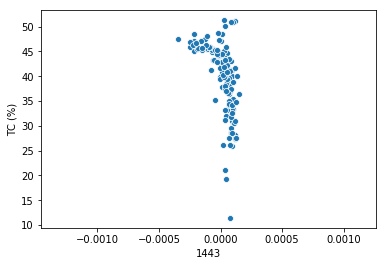

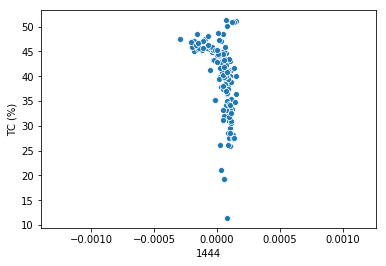

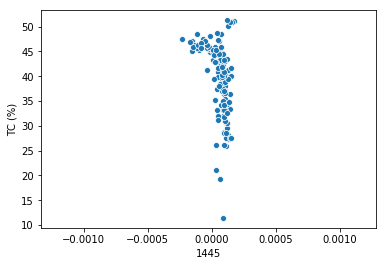

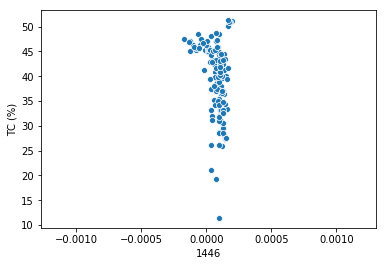

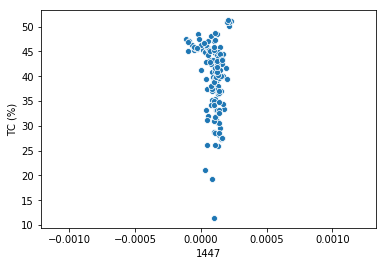

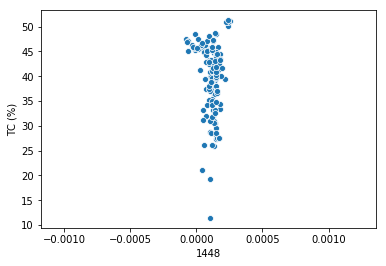

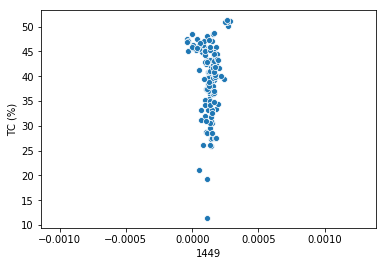

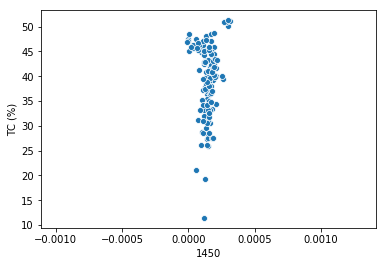

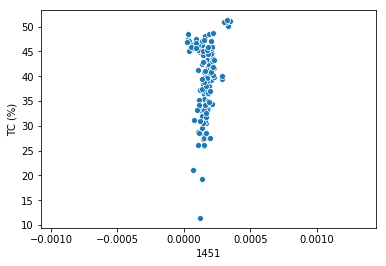

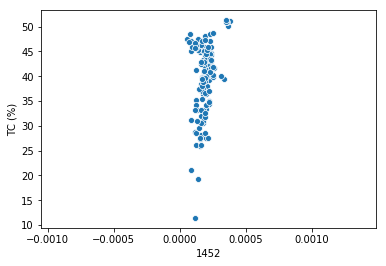

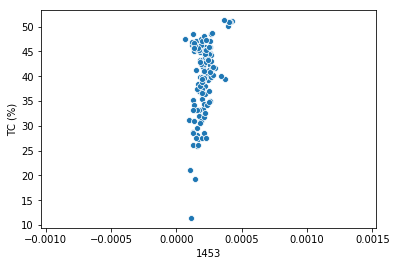

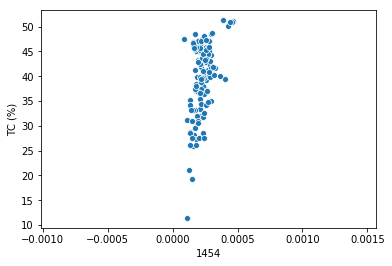

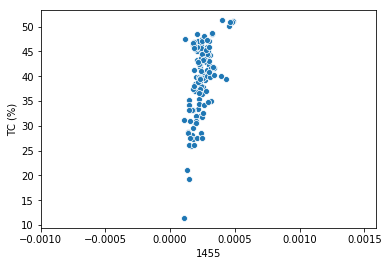

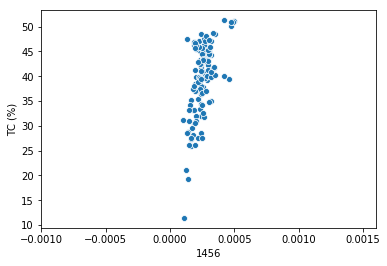

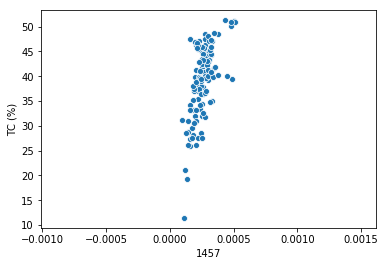

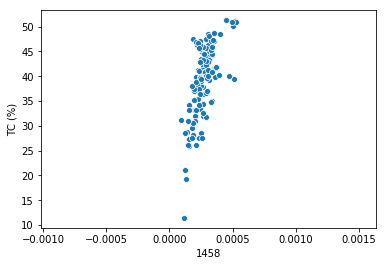

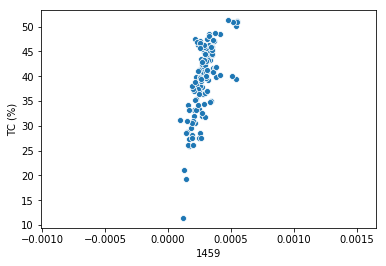

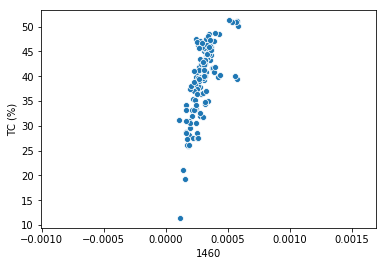

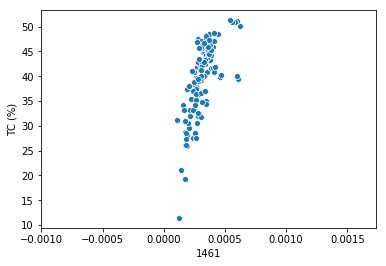

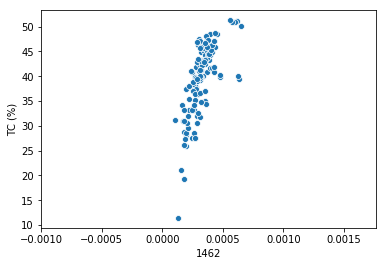

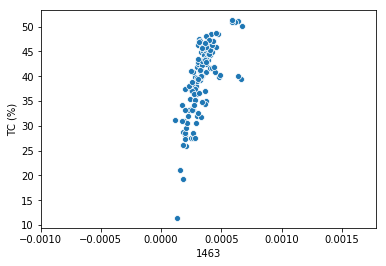

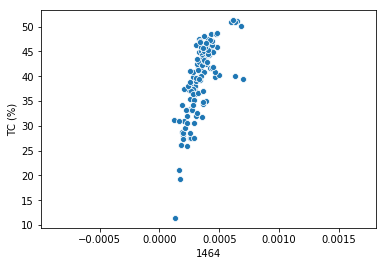

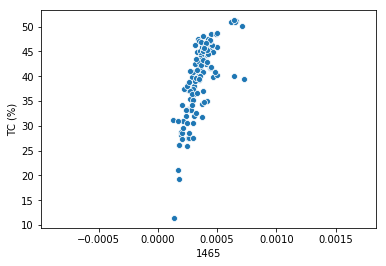

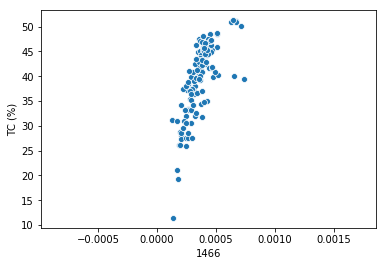

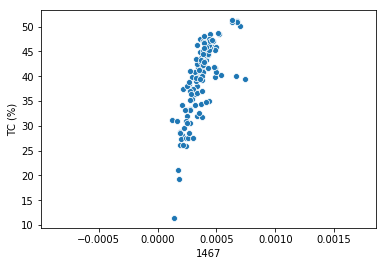

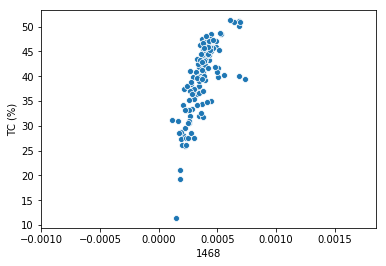

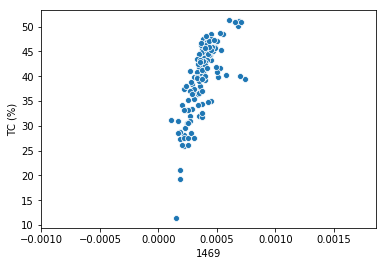

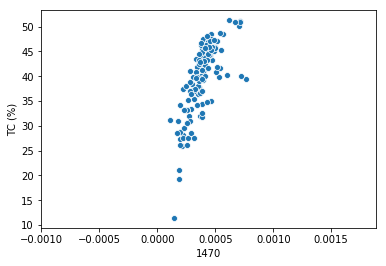

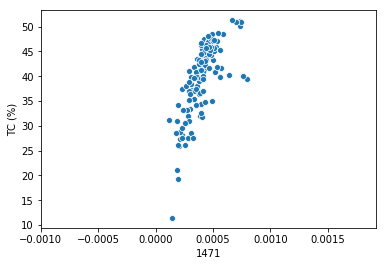

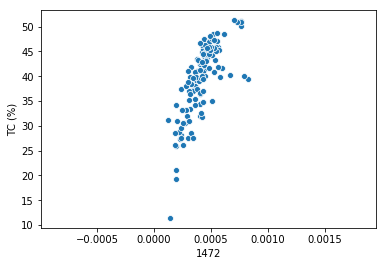

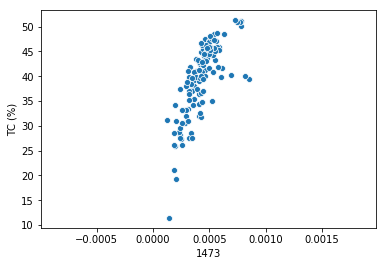

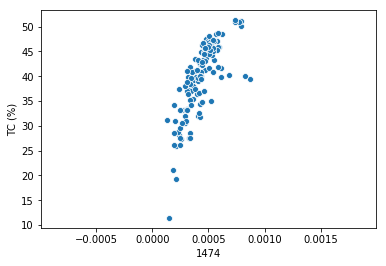

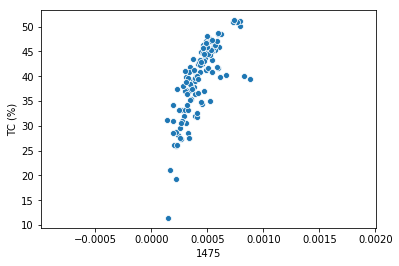

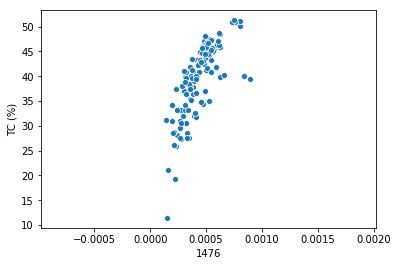

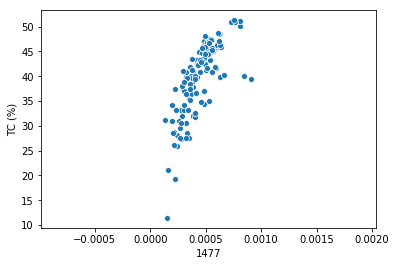

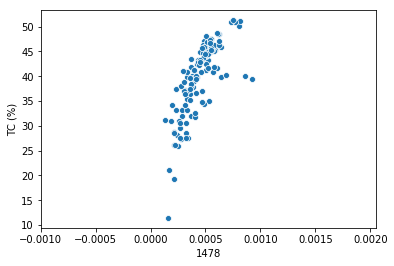

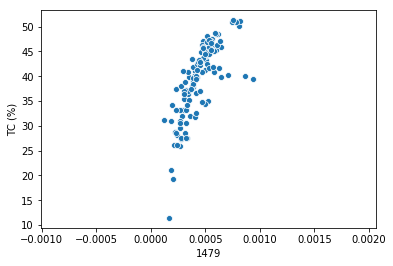

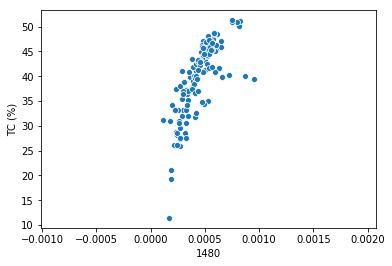

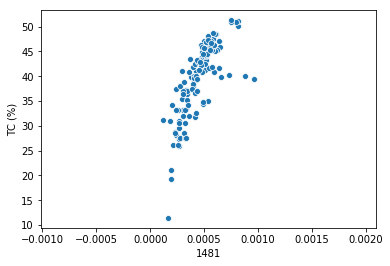

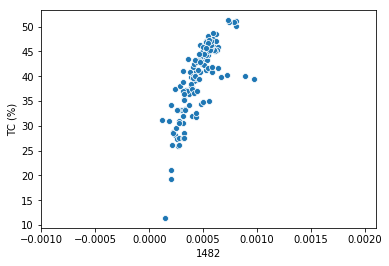

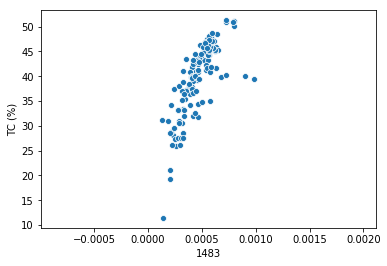

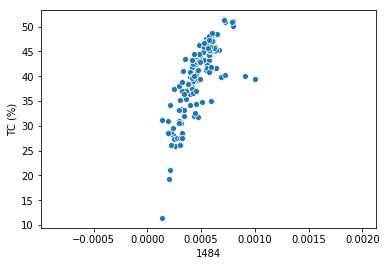

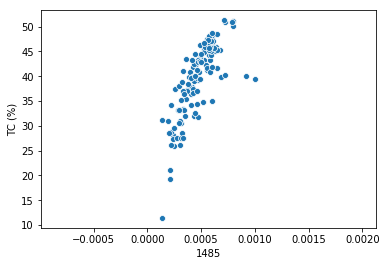

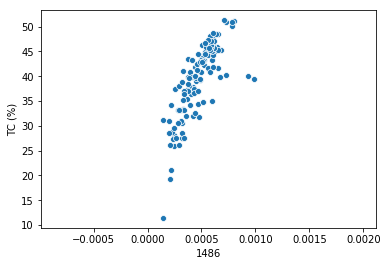

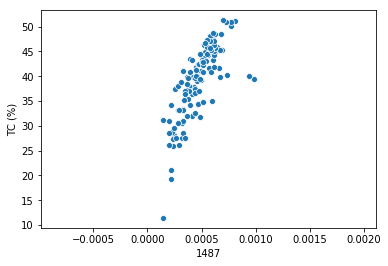

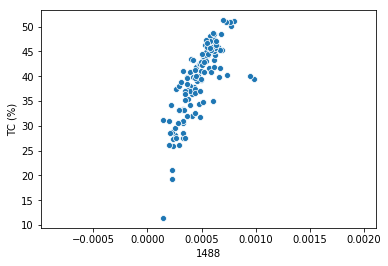

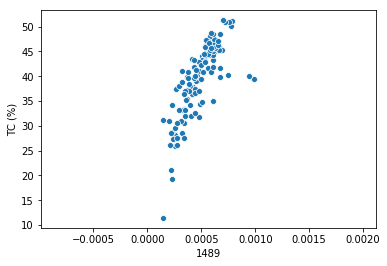

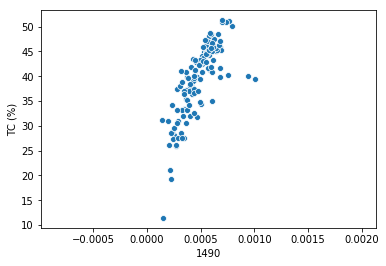

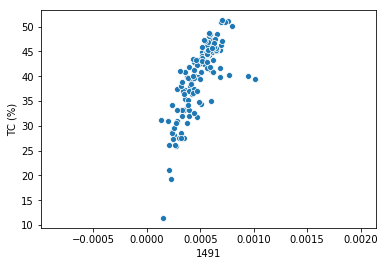

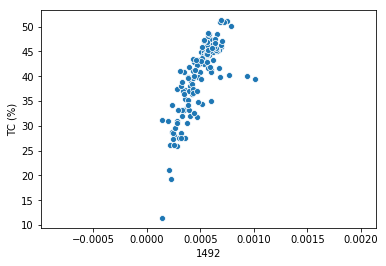

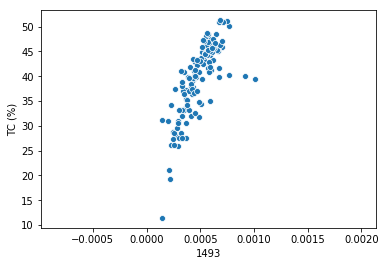

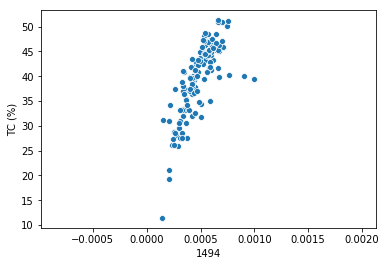

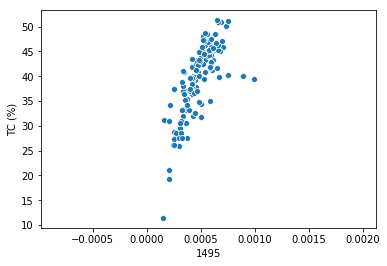

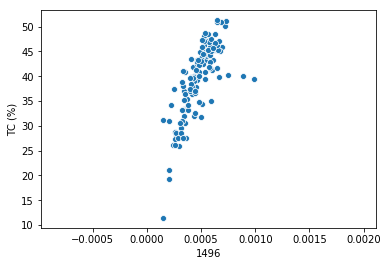

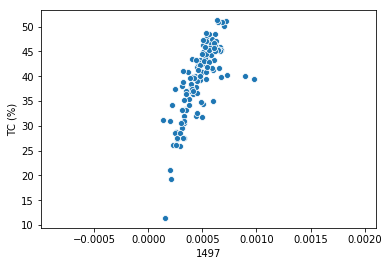

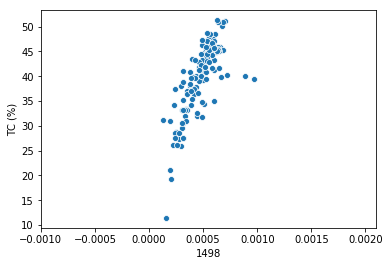

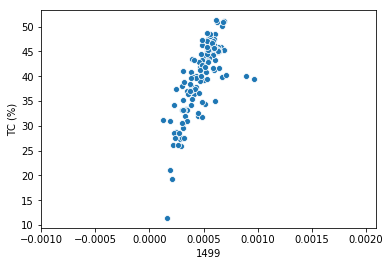

In [65]:
for i in range(1400,1500):
    plt.figure()
    sns.scatterplot(x=data_spectral[str(i)],y=data_spectral["TC (%)"])

## Same type of plot prevails for different wavelength

In [66]:
x_train, x_test, y_train, y_test = train_test_split(feature_specC,TC_target,test_size=0.3 ,random_state=56)

In [67]:
model1.fit(x_train,y_train)
model2.fit(x_train,y_train)
model3.fit(x_train,y_train)
model4.fit(x_train,y_train)
model7.fit(x_train,y_train)
model6.fit(x_train,y_train)
model5.fit(x_train,y_train)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [68]:
y1=model1.predict(x_test)
y2=model2.predict(x_test)
y3=model3.predict(x_test)
y4=model4.predict(x_test)
y6=model6.predict(x_test)
y7=model7.predict(x_test)
y5=model5.predict(x_test)



rmse(y1,y_test,1)
rmse(y2,y_test,2)
rmse(y3,y_test,3)
rmse(y4,y_test,4)
rmse(y6,y_test,5)
rmse(y7,y_test,6)
rmse(y5,y_test,7)

testscore(y1,y_test,1)
testscore(y2,y_test,2)
testscore(y3,y_test,3)
testscore(y4,y_test,4)
testscore(y5,y_test,5)
testscore(y6,y_test,6)
testscore(y7,y_test,7)

The rmse of for model  1 is  2.906979406792831
The rmse of for model  2 is  4.04710372674089
The rmse of for model  3 is  2.5534073932688464
The rmse of for model  4 is  2.3295642953136118
The rmse of for model  5 is  2.458705626943581
The rmse of for model  6 is  1.8350854158283119
The rmse of for model  7 is  2.329623368564098
The final r2 score is for model 1  is 0.7628769687086181
The final r2 score is for model 2  is 0.5404016100076415
The final r2 score is for model 3  is 0.8170509954323166
The final r2 score is for model 4  is 0.847721275499316
The final r2 score is for model 5  is 0.8477135524128061
The final r2 score is for model 6  is 0.8303699078340657
The final r2 score is for model 7  is 0.9055063999526963


# The inference is that the Adaboost performs best while predicting TC(%) with RMSE=1.83(using spectral data)

C:\Users\LENOVO\Anaconda3\lib\site-packages\matplotlib\pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


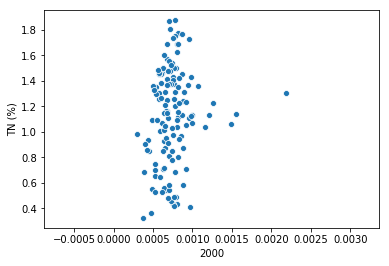

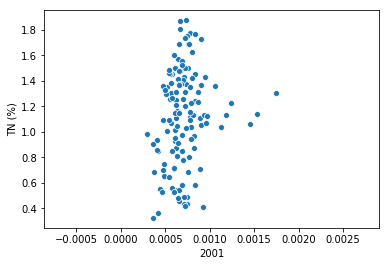

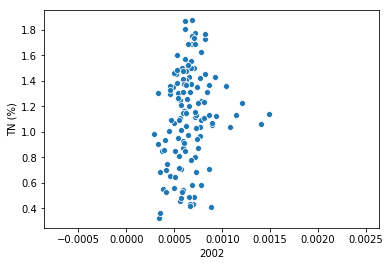

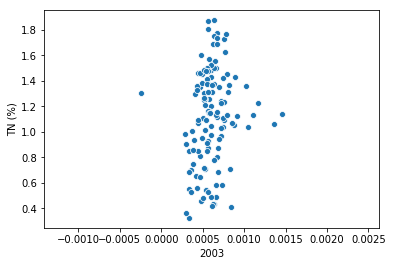

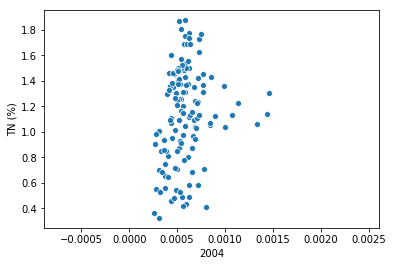

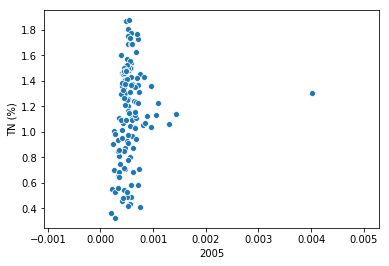

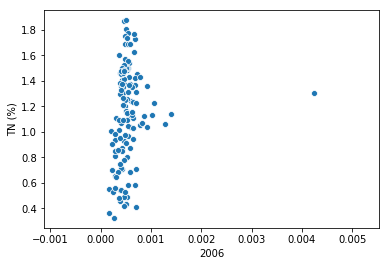

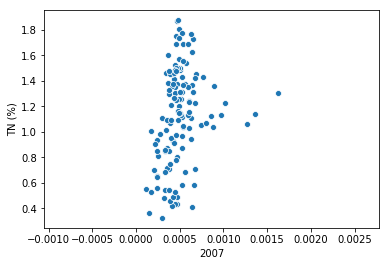

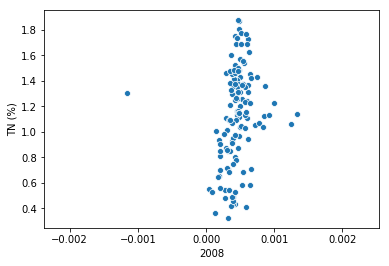

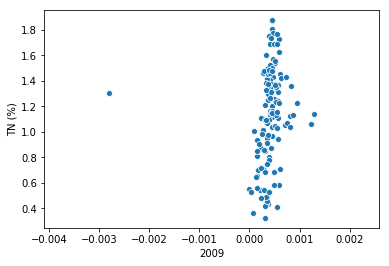

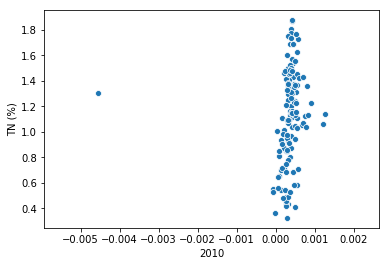

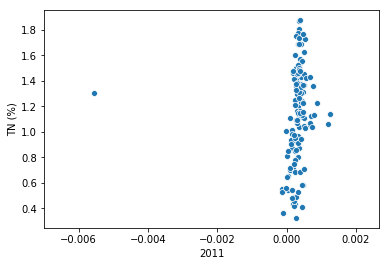

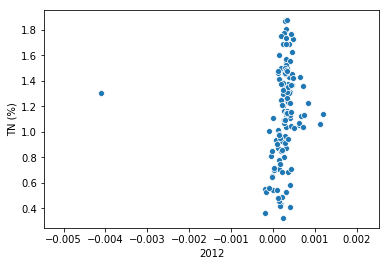

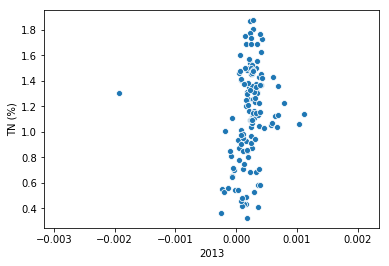

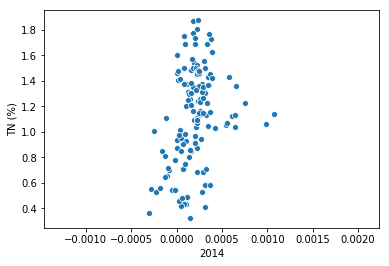

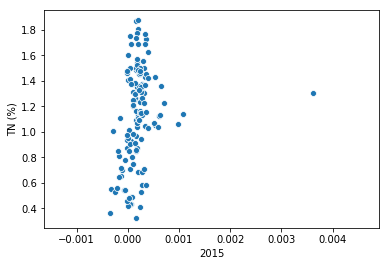

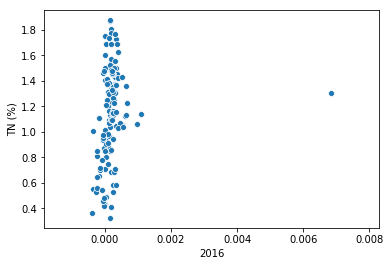

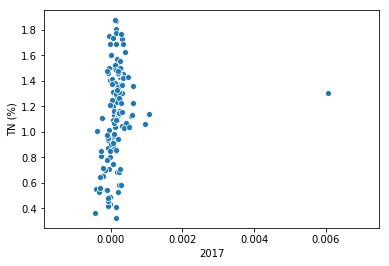

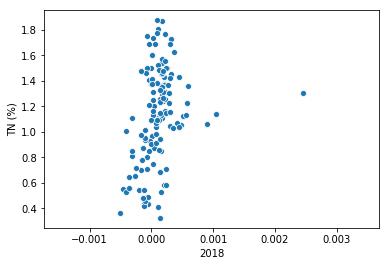

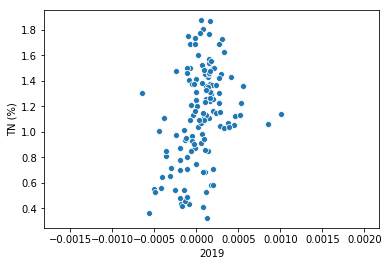

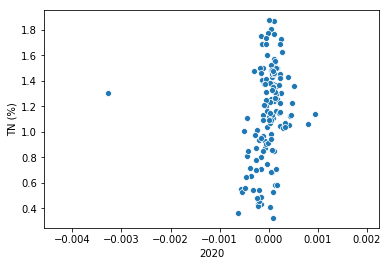

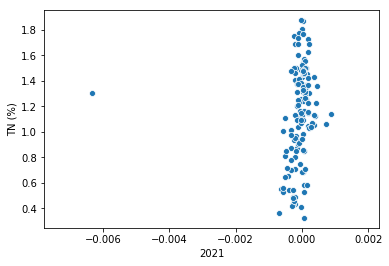

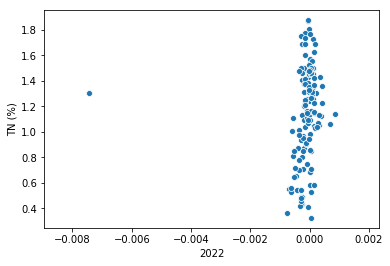

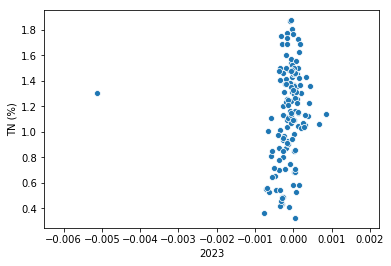

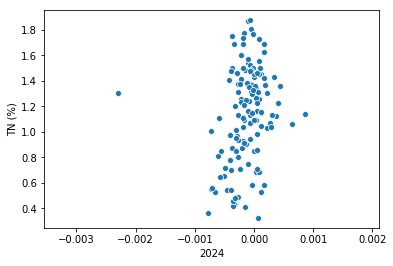

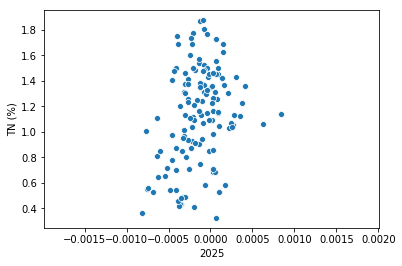

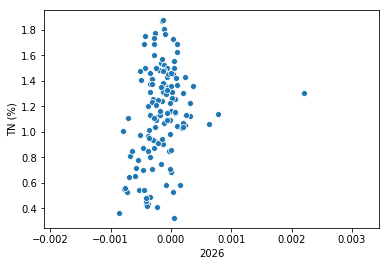

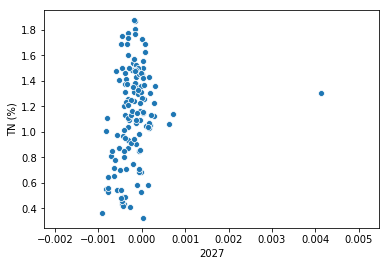

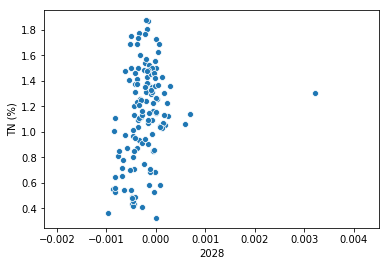

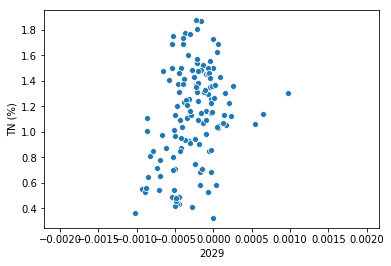

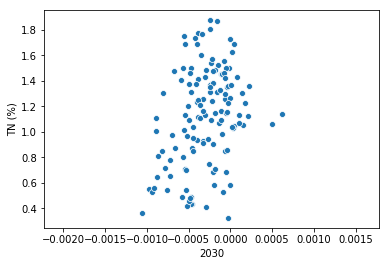

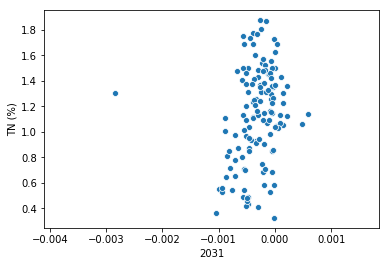

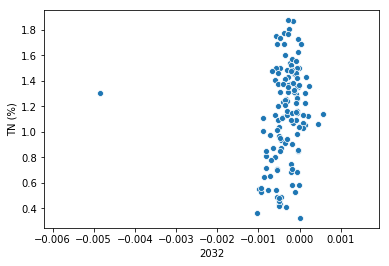

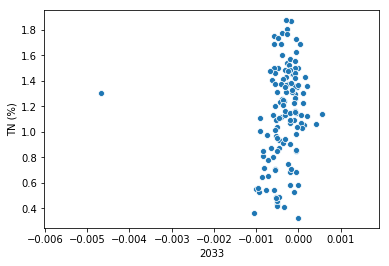

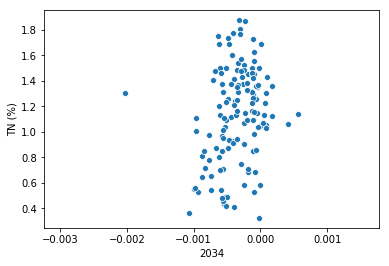

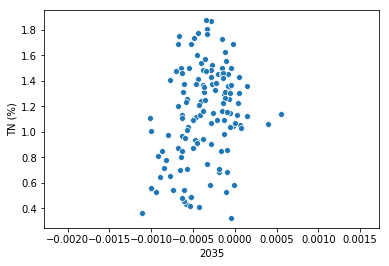

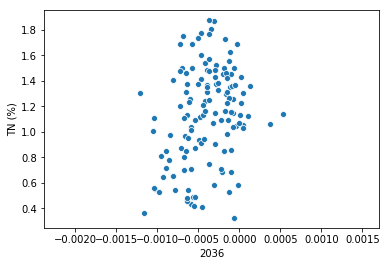

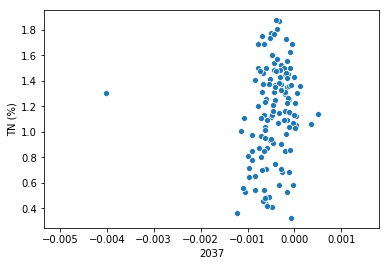

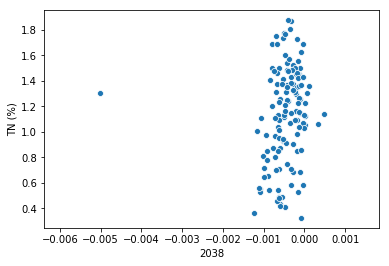

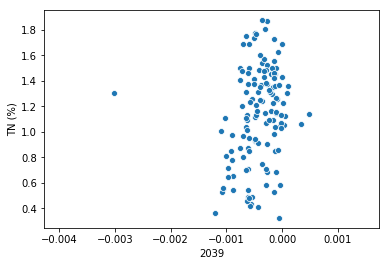

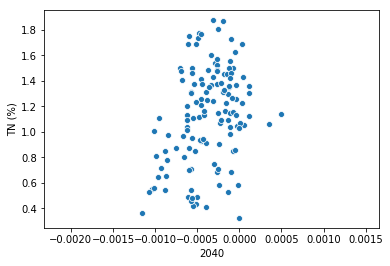

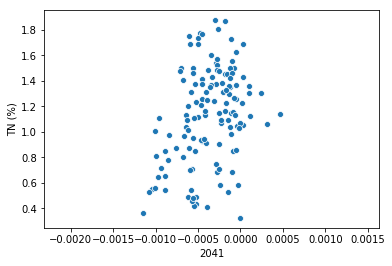

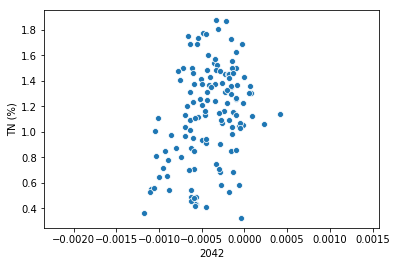

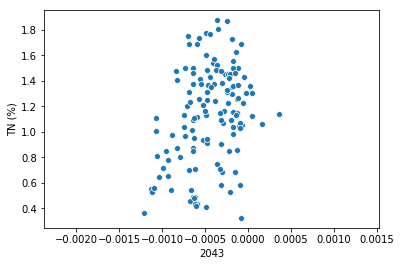

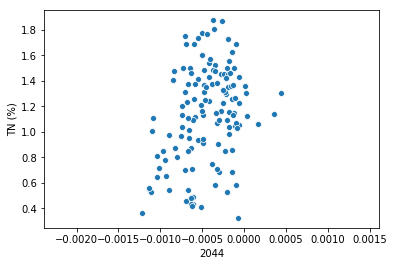

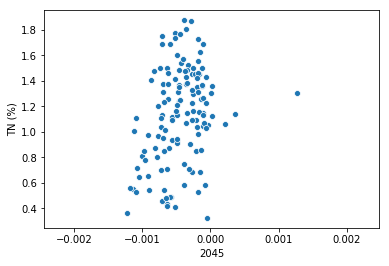

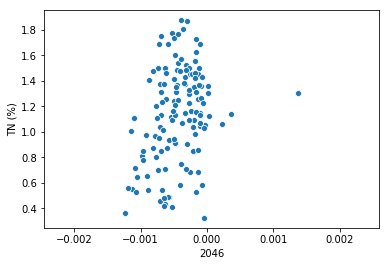

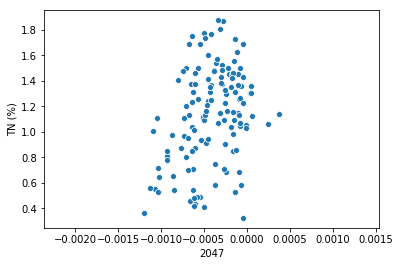

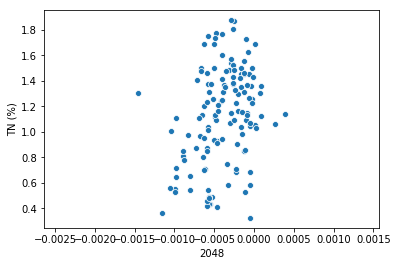

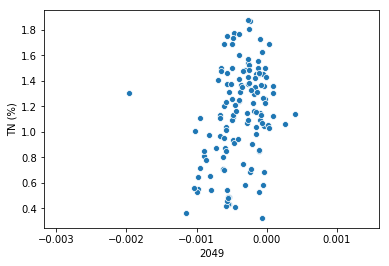

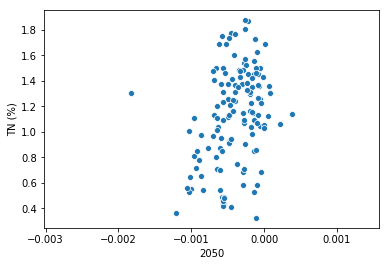

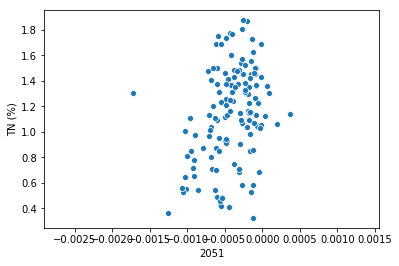

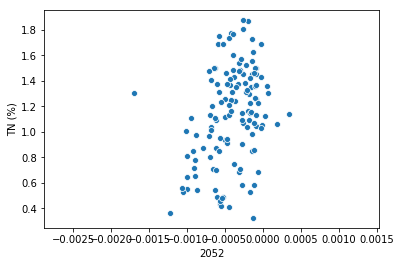

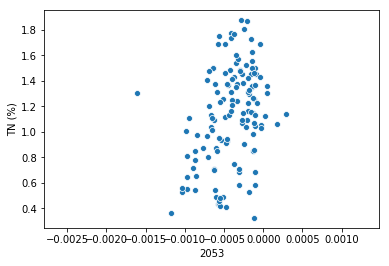

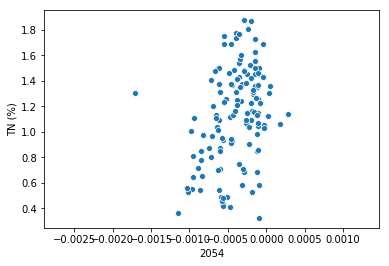

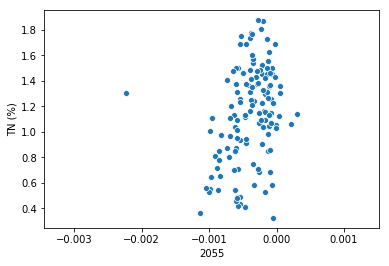

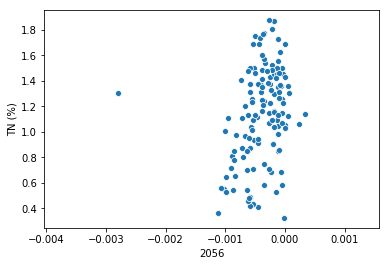

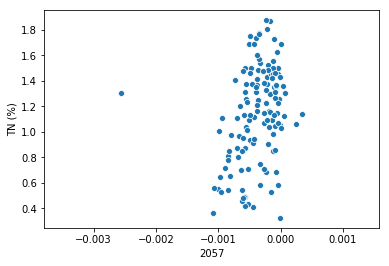

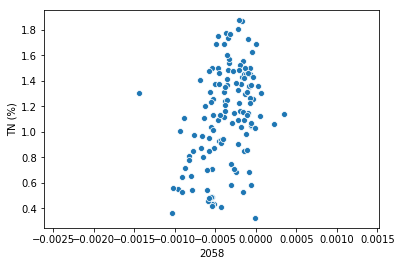

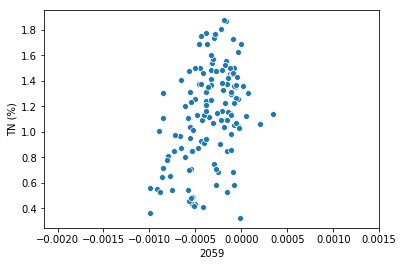

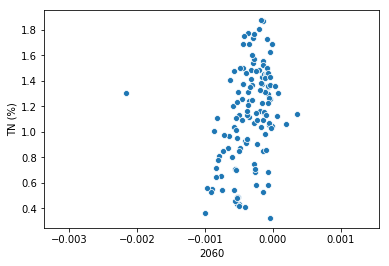

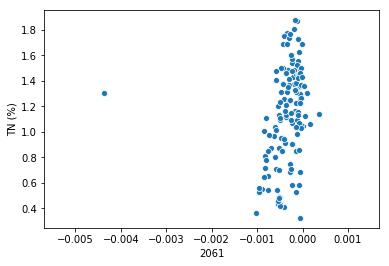

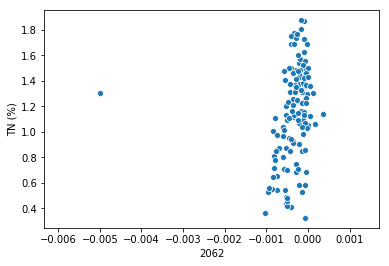

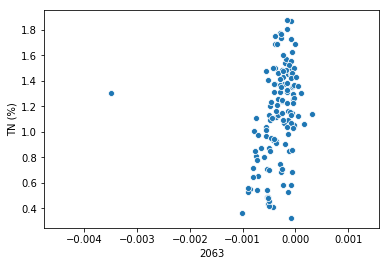

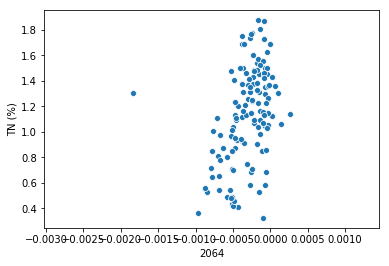

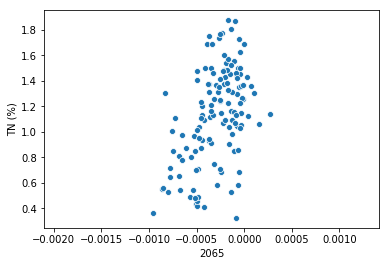

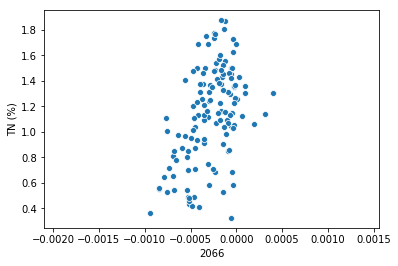

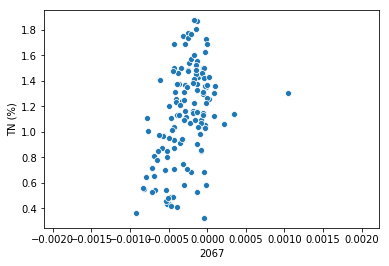

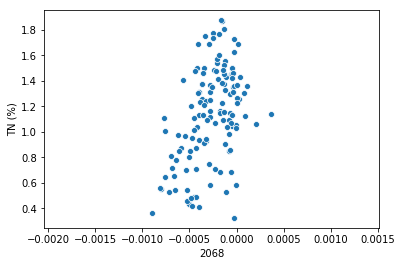

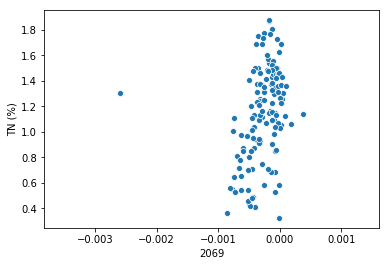

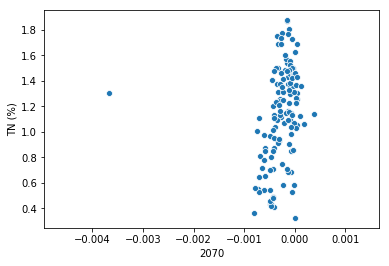

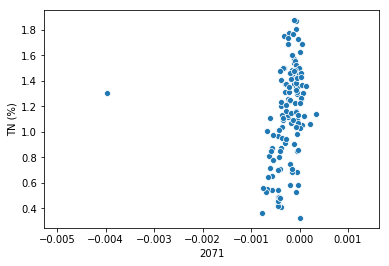

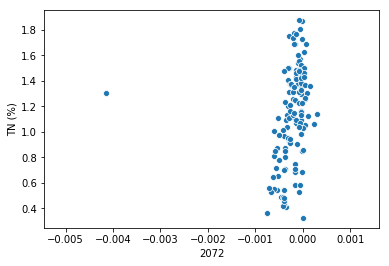

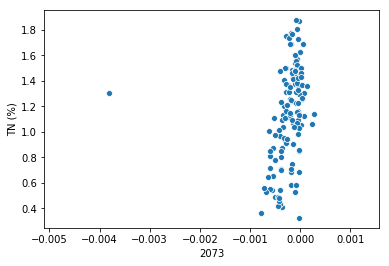

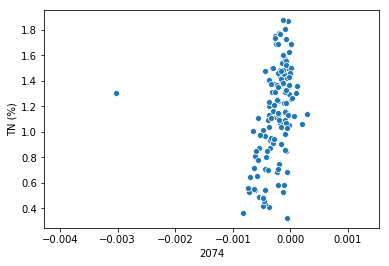

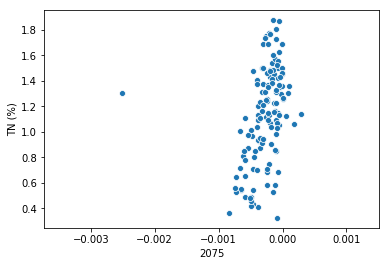

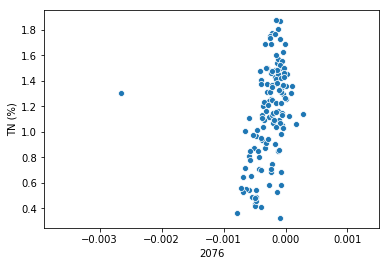

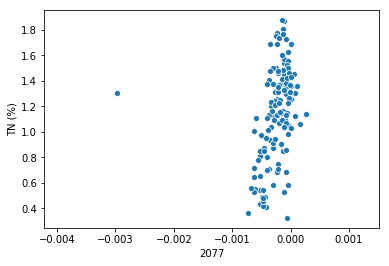

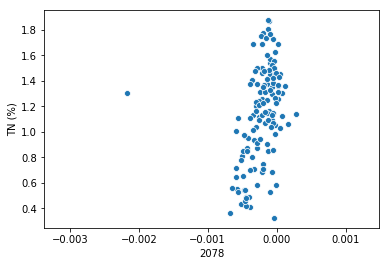

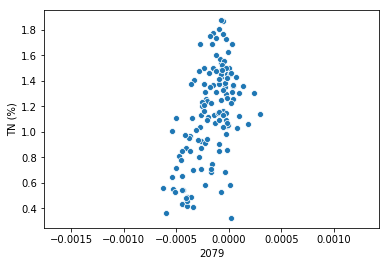

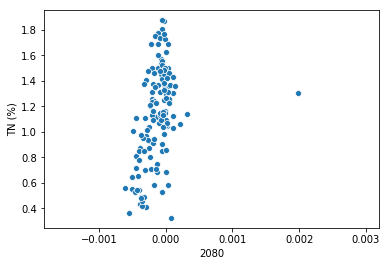

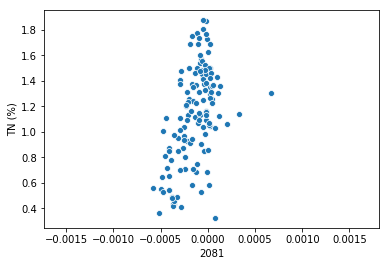

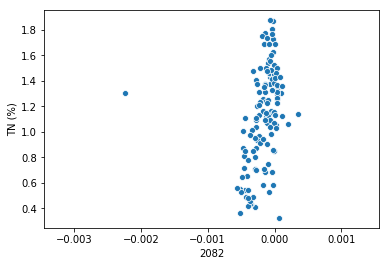

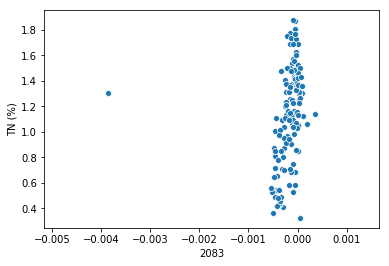

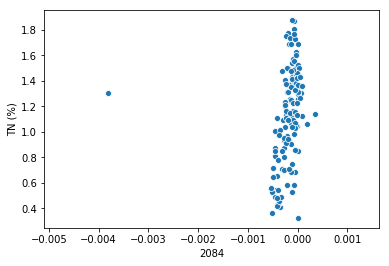

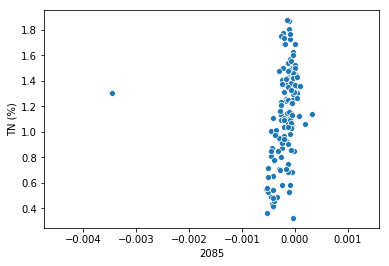

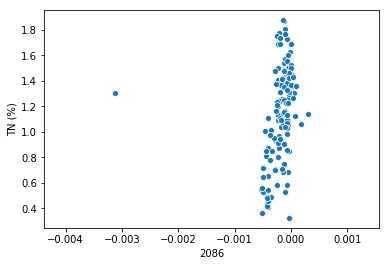

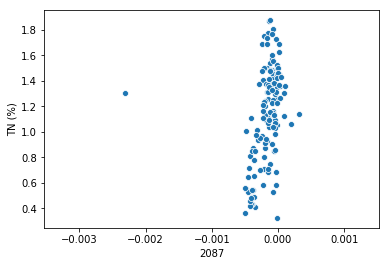

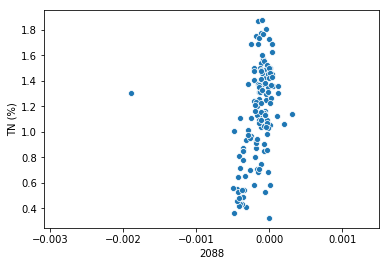

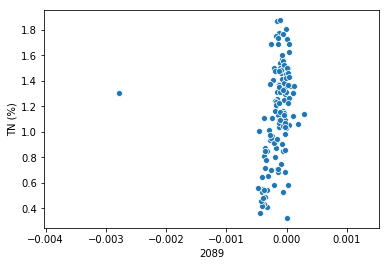

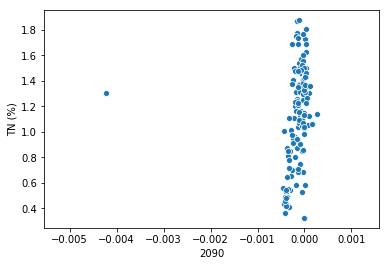

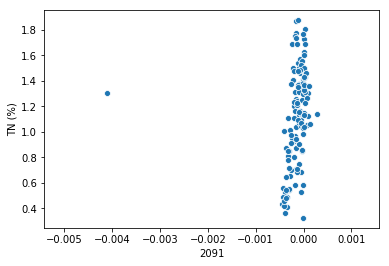

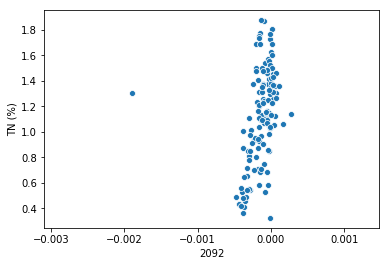

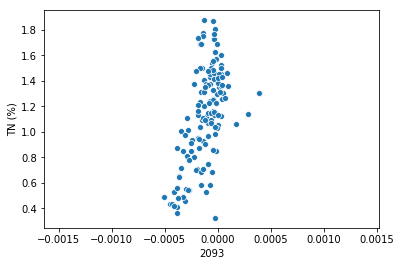

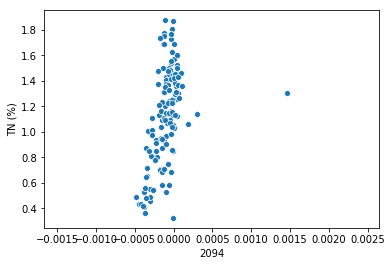

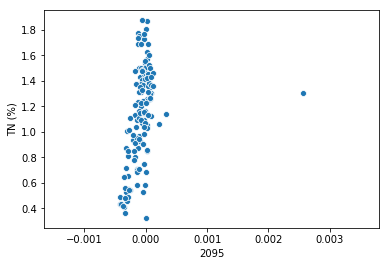

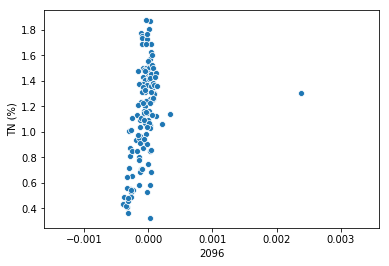

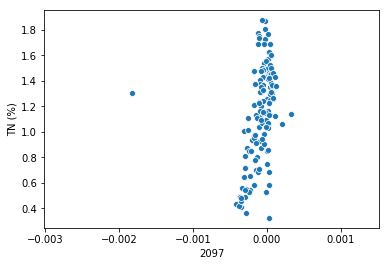

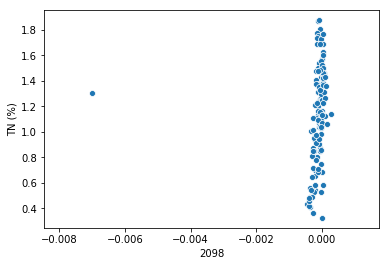

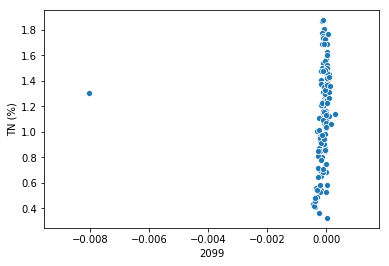

In [69]:
for i in range(2000,2100):
    plt.figure()
    sns.scatterplot(x=data_spectral[str(i)],y=data_spectral["TN (%)"])

In [70]:
TC_target=data_spectral["TN (%)"]

In [71]:
x_train, x_test, y_train, y_test = train_test_split(feature_specC,TN_target,test_size=0.3 ,random_state=56)

In [72]:
model1.fit(x_train,y_train)
model2.fit(x_train,y_train)
model3.fit(x_train,y_train)
model4.fit(x_train,y_train)
model7.fit(x_train,y_train)
model6.fit(x_train,y_train)
model5.fit(x_train,y_train)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [73]:
y1=model1.predict(x_test)
y2=model2.predict(x_test)
y3=model3.predict(x_test)
y4=model4.predict(x_test)
y6=model6.predict(x_test)
y7=model7.predict(x_test)
y5=model5.predict(x_test)



rmse(y1,y_test,1)
rmse(y2,y_test,2)
rmse(y3,y_test,3)
rmse(y4,y_test,4)
rmse(y6,y_test,5)
rmse(y7,y_test,6)
rmse(y5,y_test,7)

testscore(y1,y_test,1)
testscore(y2,y_test,2)
testscore(y3,y_test,3)
testscore(y4,y_test,4)
testscore(y5,y_test,5)
testscore(y6,y_test,6)
testscore(y7,y_test,7)

The rmse of for model  1 is  0.16209175371621704
The rmse of for model  2 is  0.32873446731366646
The rmse of for model  3 is  0.2282726785009542
The rmse of for model  4 is  0.2609627961989985
The rmse of for model  5 is  0.20642716258273508
The rmse of for model  6 is  0.2198524008960338
The rmse of for model  7 is  0.20839617622065726
The final r2 score is for model 1  is 0.8027154039031396
The final r2 score is for model 2  is 0.1885498999441173
The final r2 score is for model 3  is 0.6087276087876473
The final r2 score is for model 4  is 0.4886379088734487
The final r2 score is for model 5  is 0.6738999788578741
The final r2 score is for model 6  is 0.6800331239910415
The final r2 score is for model 7  is 0.6370608980023167


# The inference is that the Linear Regression performs best while predicting TN(%) with RMSE=0.162(using spectral data)

## Now predicting using the combined dataset

In [74]:
whole_featureC=data.drop(["Sample ","TC (%)","TN (%)",'Fe','Zn'],axis=1)

In [75]:
whole_featureC.head(2)

S     K     Ca   Ti   Mn    Rb    Sr        Al        Si       351  \
0  1451  2397  21414  172  780   9.7  29.2  10062.13  39006.40 -0.004079   
1  1765  3337  18727  414  917  17.0  32.2  14141.88  71818.36 -0.003471   

     ...         2490      2491      2492      2493      2494      2495  \
0    ...    -0.001145 -0.000503  0.000179  0.000181 -0.000007 -0.000013   
1    ...    -0.001067 -0.000095  0.000819  0.000664  0.000135 -0.000450   

       2496      2497      2498      2499  
0  0.000027  0.000090  0.000184  0.000352  
1 -0.001099 -0.000883  0.000060  0.000469  

[2 rows x 2158 columns]

In [76]:
target=data["TC (%)"]

In [77]:
x_train, x_test, y_train, y_test = train_test_split(whole_featureC,target,test_size=0.3 ,random_state=56)

In [78]:
model7= xgb.XGBRegressor(max_depth=4)

In [79]:
model1.fit(x_train,y_train)
model2.fit(x_train,y_train)
model3.fit(x_train,y_train)
model4.fit(x_train,y_train)
model7.fit(x_train,y_train)
model6.fit(x_train,y_train)
model5.fit(x_train,y_train)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [80]:
y1=model1.predict(x_test)
y2=model2.predict(x_test)
y3=model3.predict(x_test)
y4=model4.predict(x_test)
y6=model6.predict(x_test)
y7=model7.predict(x_test)
y5=model5.predict(x_test)



rmse(y1,y_test,1)
rmse(y2,y_test,2)
rmse(y3,y_test,3)
rmse(y4,y_test,4)
rmse(y6,y_test,5)
rmse(y7,y_test,6)
rmse(y5,y_test,7)

testscore(y1,y_test,1)
testscore(y2,y_test,2)
testscore(y3,y_test,3)
testscore(y4,y_test,4)
testscore(y5,y_test,5)
testscore(y6,y_test,6)
testscore(y7,y_test,7)

The rmse of for model  1 is  2.160684731011056
The rmse of for model  2 is  3.896346310968779
The rmse of for model  3 is  2.424010847335466
The rmse of for model  4 is  2.3459945042561374
The rmse of for model  5 is  2.056556689844894
The rmse of for model  6 is  1.5651095179040309
The rmse of for model  7 is  2.013842404549168
The final r2 score is for model 1  is 0.868999596435864
The final r2 score is for model 2  is 0.574004581257216
The final r2 score is for model 3  is 0.8351234293890678
The final r2 score is for model 4  is 0.8455656841245371
The final r2 score is for model 5  is 0.8862003856051781
The final r2 score is for model 6  is 0.8813217322083433
The final r2 score is for model 7  is 0.9312647854180109


# The inference is that the Ada-Boost performs best while predicting TC(%) with RMSE=1.565 (using combined data)

In [81]:
target=data["TN (%)"]

In [82]:
whole_featureN=data.drop(["Sample ","TC (%)","TN (%)"],axis=1)

In [83]:
x_train, x_test, y_train, y_test = train_test_split(whole_featureN,target,test_size=0.3 ,random_state=56)

In [84]:
model7= xgb.XGBRegressor(max_depth=3)

In [85]:
model1.fit(x_train,y_train)
model2.fit(x_train,y_train)
model3.fit(x_train,y_train)
model4.fit(x_train,y_train)
model7.fit(x_train,y_train)
model6.fit(x_train,y_train)
model5.fit(x_train,y_train)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [86]:
y1=model1.predict(x_test)
y2=model2.predict(x_test)
y3=model3.predict(x_test)
y4=model4.predict(x_test)
y6=model6.predict(x_test)
y7=model7.predict(x_test)
y5=model5.predict(x_test)

rmse(y1,y_test,1)
rmse(y2,y_test,2)
rmse(y3,y_test,3)
rmse(y4,y_test,4)
rmse(y6,y_test,5)
rmse(y7,y_test,6)
rmse(y5,y_test,7)

testscore(y1,y_test,1)
testscore(y2,y_test,2)
testscore(y3,y_test,3)
testscore(y4,y_test,4)
testscore(y5,y_test,5)
testscore(y6,y_test,6)
testscore(y7,y_test,7)

The rmse of for model  1 is  0.13888720221831197
The rmse of for model  2 is  0.33421557414339625
The rmse of for model  3 is  0.1969496744094796
The rmse of for model  4 is  0.21877045275813645
The rmse of for model  5 is  0.19261174509146012
The rmse of for model  6 is  0.18329205033132293
The rmse of for model  7 is  0.1940094883772704
The final r2 score is for model 1  is 0.8551575728140071
The final r2 score is for model 2  is 0.16126512324375641
The final r2 score is for model 3  is 0.7087393131511561
The final r2 score is for model 4  is 0.6406243345900396
The final r2 score is for model 5  is 0.7173706395700843
The final r2 score is for model 6  is 0.7214283817717644
The final r2 score is for model 7  is 0.7477340739727397


# The inference is that the Linear Regression performs best while predicting TN(%) with RMSE=0.138(using combined data)